# Clinical Evaluation

The first two sheets include clinical annotations of all the patients for disease-free survival/recurrence and for overall survival. 

To perform clinical evaluation specific output format should be obtained!
\
These are the columns and their order:
\
Some new columns need to be created and added, e.g. (DISEASE FREE FOR MORE THAN 5 YEARS becomes 1) IFF (DFS_STATUS IS 'DiseaseFree'
 AND DFS_MONTHS IS >60 MONTHS)

In [1]:
%cd ../src

/Users/ivamilojkovic/Breast-Cancer-Analysis/src


In [2]:
import pandas as pd
import pickle, os
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import FunctionTransformer

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_theme()
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]


df_clinical_dfs = pd.read_excel(r'../data/OS_DFS_TCGA_TCGATEST_PANCA.xlsx', engine='openpyxl', sheet_name='ALL BREAST TCGA-PANCA DFS')
df_clinical_dfs.head()

/Users/ivamilojkovic/opt/anaconda3/envs/bca_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Study ID,Patient ID,DFS_STATUS,DFS_MONTHS
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,Recurred/Progressed,59.440444
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,DiseaseFree,131.669790
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,DiseaseFree,48.459743
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,NaN,NaN
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,DiseaseFree,11.440971


In [3]:
df_clinical_os = pd.read_excel(r'../data/OS_DFS_TCGA_TCGATEST_PANCA.xlsx', engine='openpyxl', sheet_name='ALL BREAST TCGA PANCA OS')
print(df_clinical_os.shape)
df_clinical_os.head()

(1084, 4)


,Study ID,Patient ID,OS_STATUS,OS_MONTHS
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,LIVING,133.050597
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,LIVING,131.669790
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,LIVING,48.459743
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,LIVING,47.604958
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,LIVING,11.440971


In [4]:
df_clinical_out_cols = pd.read_excel(r'../data/OS_DFS_TCGA_TCGATEST_PANCA.xlsx', engine='openpyxl', sheet_name='EXAMPLE output - OS DFS SUBTYPE').columns
df_clinical_out_cols = df_clinical_out_cols[:-2]
df_clinical_out_cols

Index(['Patient ID', 'DFS_STATUS', 'DFS_MONTHS', 'RECURRED BEFORE 5 YEARS',
       'RECURRED AFTER FIVE YEARS', 'DISEASE FREE FOR LESS THAN 5 YEARS',
       'DISEASE FREE FOR MORE THAN 5 YEARS', 'OS_STATUS', 'OS_MONTHS',
       'DECEASED WITHIN 5 YEARS', 'SUBTYPE', 'IS LUMA',
       'TRAINING OR TESTING?'],
      dtype='object')

In [6]:
with open('../data/dataset_multilabel.pkl', 'rb') as file:
    df_multi = pickle.load(file)
    
labels = ['Basal', 'Her2', 'LumA', 'LumB', 'Normal']
df_multi[labels] = discard_negative_correlations(df_multi[labels])

print(df_multi.shape)
df_multi.head()

(1053, 25159)


,tcga_id,expert_PAM50_subtype,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,ZYX,ZZEF1,ZZZ3,Subtype-from Parker centroids,MaxCorr,Basal,Her2,LumA,LumB,Normal
0,TCGA-3C-AAAU,LumA,57898,67829,134,1697402,44314,1737,568,0,...,1054121,557596,409660,LumA,0.373445,0.0,0.000000,0.373445,0.179928,0.000000
1,TCGA-3C-AALI,Her2,52146,65152,1361,1403901,36852,1636,1357,41,...,1041074,247545,88163,Her2,0.647827,0.0,0.647827,0.000000,0.247731,0.000000
2,TCGA-3C-AALJ,LumB,52172,29356,510,989281,30378,282,1974,119,...,613785,110466,68745,LumB,0.357503,0.0,0.000000,0.144970,0.357503,0.000000
3,TCGA-3C-AALK,LumA,50517,43436,287,2674831,69374,816,2084,172,...,1397623,196615,206477,LumA,0.666747,0.0,0.000000,0.666747,0.000000,0.458535
4,TCGA-4H-AAAK,LumA,66433,66229,192,2279532,56667,1603,2425,246,...,970767,199472,246179,LumA,0.556303,0.0,0.000000,0.556303,0.000000,0.503962


In [7]:
# with open('../data/tcga_cris_raw_24356_620samples.pkl', 'rb') as file:
#     df_multi = pickle.load(file)
    
# df_multi[['CRIS.A', 'CRIS.B', 'CRIS.C', 'CRIS.D', 'CRIS.E']] = discard_negative_correlations(df_multi[['CRIS.A', 'CRIS.B', 'CRIS.C', 'CRIS.D', 'CRIS.E']])

# print(df_multi.shape)
# df_multi.head()

# Mcut + Percentile

In [8]:
from utils import m_cut_strategy_class_assignment, create_mcut_nth_percentile_labels
# Compute threshold and labels
m_cuts, threshs = m_cut_strategy_class_assignment(df_multi[labels]) # ['Basal', 'Her2', 'LumA', 'LumB', 'Normal']
threshs = pd.Series(threshs, index=df_multi.index)

In [9]:
m_5perc_cuts, thresh_5perc = create_mcut_nth_percentile_labels(m_cuts, df_multi[labels], df_multi['Subtype-from Parker centroids'], N=5, keep_primary=False)
m_10perc_cuts, thresh_10perc = create_mcut_nth_percentile_labels(m_cuts, df_multi[labels], df_multi['Subtype-from Parker centroids'], N=10, keep_primary=False)
m_25perc_cuts, thresh_25perc = create_mcut_nth_percentile_labels(m_cuts, df_multi[labels], df_multi['Subtype-from Parker centroids'], N=25, keep_primary=False)
m_cuts.sum(), m_5perc_cuts.sum(), m_10perc_cuts.sum(), m_25perc_cuts.sum()

(Basal     204
 Her2      104
 LumA      683
 LumB      245
 Normal    368
 dtype: int64,
 Basal     203
 Her2      102
 LumA      677
 LumB      240
 Normal    353
 dtype: int64,
 Basal     202
 Her2      100
 LumA      671
 LumB      236
 Normal    339
 dtype: int64,
 Basal     200
 Her2       96
 LumA      653
 LumB      223
 Normal    294
 dtype: int64)

Text(0.5, 1.0, 'Secondary Class Correlations')

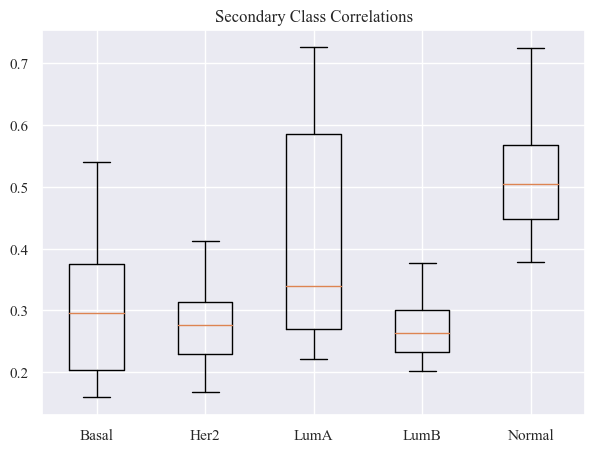

In [10]:
plt.figure(figsize=(7, 5))
df_secondary_classes_corr = []
for target_class in m_cuts.columns:
    secondary_target_corr = df_multi.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_class]
    secondary_target_label = m_25perc_cuts.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_class]
    secondary_target_corr = secondary_target_corr[secondary_target_label==1]
    df_secondary_classes_corr.append(secondary_target_corr)

plt.boxplot(df_secondary_classes_corr)
plt.xticks([1, 2, 3, 4, 5], m_cuts.columns)
plt.title('Secondary Class Correlations')


Text(0.5, 1.0, 'Primary Class Correlations')

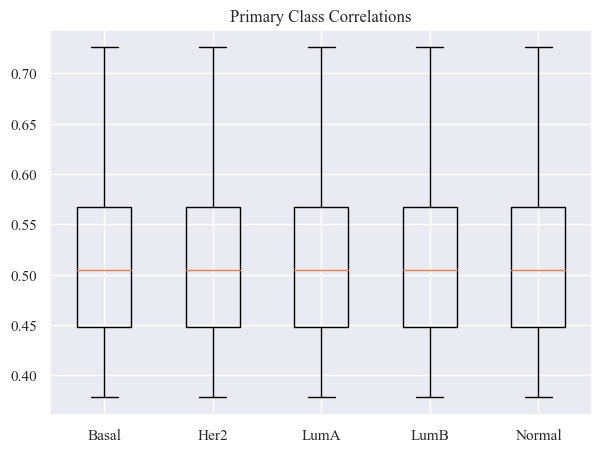

In [11]:
plt.figure(figsize=(7, 5))
df_secondary_classes_corr = []
for target_class in m_cuts.columns:
    primary_target_corr = df_multi.loc[df_multi['Subtype-from Parker centroids'] == target_class, :][target_class]
    primary_target_label = m_cuts.loc[df_multi['Subtype-from Parker centroids'] == target_class, :][target_class]
    primary_target_corr = primary_target_corr[primary_target_label==1]
    df_secondary_classes_corr.append(secondary_target_corr)

plt.boxplot(df_secondary_classes_corr)
plt.xticks([1, 2, 3, 4, 5], m_cuts.columns)
plt.title('Primary Class Correlations')

In [12]:
thresh_5perc, thresh_10perc, thresh_25perc

(Basal     0.136927
 Her2      0.122363
 LumA      0.140370
 LumB      0.128101
 Normal    0.258833
 dtype: float64,
 Basal     0.150444
 Her2      0.133196
 LumA      0.165465
 LumB      0.146900
 Normal    0.313613
 dtype: float64,
 Basal     0.158607
 Her2      0.167899
 LumA      0.218199
 LumB      0.200960
 Normal    0.378055
 dtype: float64)

In [13]:
target_class = 'Normal'
primary_corr = df_multi.loc[df_multi['Subtype-from Parker centroids'] == target_class, :][target_class]
primary_label = m_10perc_cuts.loc[df_multi['Subtype-from Parker centroids'] == target_class, :][target_class]
secondary_corr = df_multi.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_class]
secondary_label = m_10perc_cuts.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_class]
only_labeled_secondary = secondary_label * secondary_corr
print('Min sec class corr: ', only_labeled_secondary[only_labeled_secondary>0].min())
print('Second class cardinality: ', secondary_label.sum())

Min sec class corr:  0.313613445378151
Second class cardinality:  268


In [14]:
target_class = 'Normal'
print(df_multi.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_class].quantile(0.05))
(df_multi.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_class]*m_cuts[target_class]).quantile(0.05)

0.0


0.0

In [19]:
m_cuts.head()

,Basal,Her2,LumA,LumB,Normal
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,1,0,1
4,0,0,1,0,1


In [22]:
df_multi[[*labels, 'Subtype-from Parker centroids']].head()

,Basal,Her2,LumA,LumB,Normal,Subtype-from Parker centroids
0,0.0,0.000000,0.373445,0.179928,0.000000,LumA
1,0.0,0.647827,0.000000,0.247731,0.000000,Her2
2,0.0,0.000000,0.144970,0.357503,0.000000,LumB
3,0.0,0.000000,0.666747,0.000000,0.458535,LumA
4,0.0,0.000000,0.556303,0.000000,0.503962,LumA


In [27]:
target_class = 'LumA'
not_target_class_df = df_multi.loc[df_multi['Subtype-from Parker centroids'] != target_class, :]

not_target_class_df[[target_class]].describe()

,LumA
count,488.000000
mean,0.103005
std,0.173865
min,0.000000
25%,0.000000
50%,0.000000
75%,0.157407
max,0.726194


Basal
0.13692677070828324
25:  0.15860744297719076
50:  0.2215606242497
75:  0.357935174069628

Cardinality:  16
Minimal correlation:  0.105018007202881
Her2
0.12236254501800725
25:  0.1678991596638655
50:  0.2362545018007205
75:  0.2934453781512605

Cardinality:  32
Minimal correlation:  0.0877310924369748
LumA
0.14036974789915946
25:  0.21819927971188452
50:  0.283889555822329
75:  0.5156782713085232

Cardinality:  118
Minimal correlation:  0.0649699879951981
LumB
0.1281008403361345
25:  0.20096038415366174
50:  0.2433613445378155
75:  0.2805522208883553

Cardinality:  88
Minimal correlation:  0.0427851140456183
Normal
0.2588331332533016
25:  0.378055222088836
50:  0.465834333733493
75:  0.546794717887155

Cardinality:  297
Minimal correlation:  0.0846578631452581


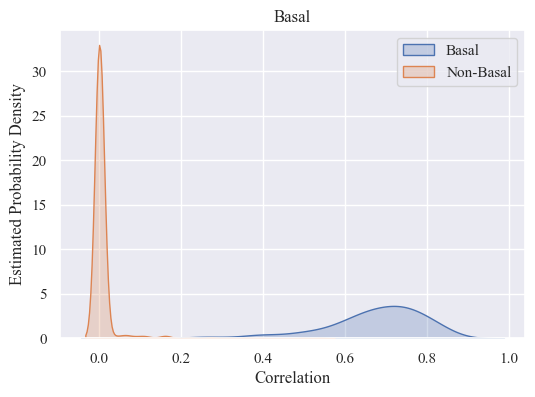

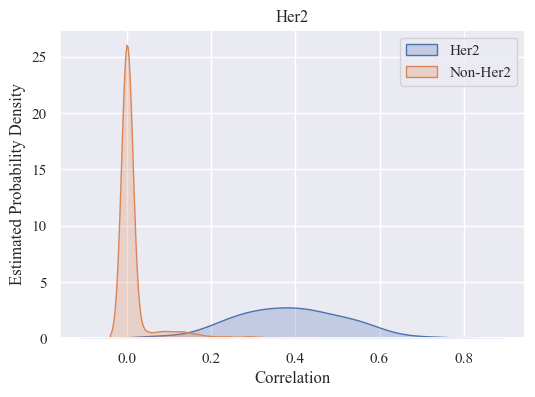

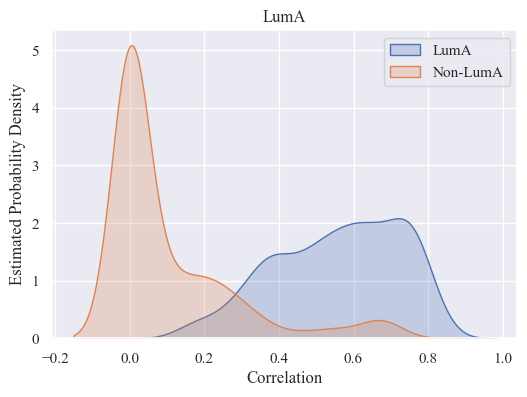

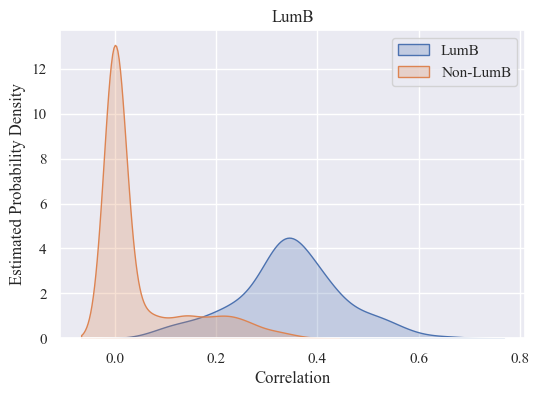

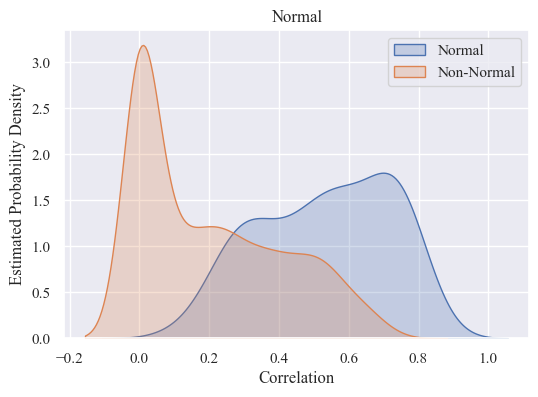

In [34]:
# List of target classes
target_classes = labels
filter_type_mcut = m_cuts

# Create plots for each target class
for i, target_class in enumerate(target_classes):
    print(target_class)
    # sns.set(style="white")
    plt.figure(figsize=(6, 4))
    
    target_class_df = df_multi.loc[df_multi['Subtype-from Parker centroids'] == target_class, :]
    mcut_target_class_df = filter_type_mcut.loc[df_multi['Subtype-from Parker centroids'] == target_class, :][target_classes]   

    not_target_class_df = df_multi.loc[df_multi['Subtype-from Parker centroids'] != target_class, :]
    mcut_not_target_class_df = filter_type_mcut.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_classes]   
      
    sns.kdeplot(data=target_class_df[target_class].drop(columns=target_class), label=f"{target_class}", shade=True)
    sns.kdeplot(data=not_target_class_df[target_class],label=f"Non-{target_class}" , shade=True)
    
    # plt.axvline(intersections[i], color='red', linestyle='--', label=f'Intersection: {intersections[i]:.2f}')
    secondary_target_corr = df_multi.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_class]
    secondary_target_label = filter_type_mcut.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_class]
    secondary_target_corr = secondary_target_corr[secondary_target_label==1]
    print(secondary_target_corr.quantile(0.05))

    print('25: ',secondary_target_corr.quantile(0.25))
    print('50: ',secondary_target_corr.quantile(0.5))
    print('75: ',secondary_target_corr.quantile(0.75))

    print('\nCardinality: ', secondary_target_corr.shape[0])
    print('Minimal correlation: ', secondary_target_corr.min())

    # sns.kdeplot(data=target_class_df[target_class].drop(columns=target_class), label=f"{target_class}", shade=True)
    # sns.kdeplot(data=secondary_target_corr,label=f"Non-{target_class}" , shade=True)

    plt.axvline(secondary_target_corr.quantile(0.05), color='red', linestyle='--', label=f'5th percentile: {secondary_target_corr.quantile(0.05):.2f}', linewidth=1)
    plt.axvline(secondary_target_corr.quantile(0.10), color='green', linestyle='--', label=f'10th percentile: {secondary_target_corr.quantile(0.1):.2f}', linewidth=1)
    plt.axvline(secondary_target_corr.quantile(0.25), color='blue', linestyle='--', label=f'25th percentile: {secondary_target_corr.quantile(0.25):.2f}', linewidth=1)
    # plt.axvline(not_target_thresh, color='blue', linestyle='--', label=f'Intersection: {not_target_thresh:.2f}', linewidth=1)

    plt.xlabel("Correlation")
    plt.ylabel("Estimated Probability Density")
    plt.title(f"{target_class}")
    plt.legend()


### Percentile testing

In [15]:
from utils import create_mcut_nth_percentile_labels
y_mcut_perc = create_mcut_nth_percentile_labels(
        m_cuts, 
        df_multi[target_classes], 
        df_multi['Subtype-from Parker centroids'], 
        keep_primary = True, 
        N=5)
y_mcut_perc

(      Basal  Her2  LumA  LumB  Normal
 0         0     0     1     0       0
 1         0     1     0     0       0
 2         0     0     0     1       0
 3         0     0     1     0       1
 4         0     0     1     0       1
 ...     ...   ...   ...   ...     ...
 1048      0     0     1     0       1
 1049      0     0     0     0       1
 1050      0     0     0     0       1
 1051      0     0     1     0       1
 1052      1     0     0     0       1
 
 [1053 rows x 5 columns],
 Basal     0.136927
 Her2      0.122363
 LumA      0.140370
 LumB      0.128101
 Normal    0.258833
 dtype: float64)

In [16]:
(y_mcut_perc.sum(axis=1) < m_cuts.sum(axis=1)).sum()

AttributeError: 'tuple' object has no attribute 'sum'

In [ ]:
# List of target classes
target_classes = ['Basal', 'Her2', 'LumA', 'LumB', 'Normal']

# Create plots for each target class
for i, target_class in enumerate(target_classes):
    # sns.set(style="white")
    plt.figure(figsize=(6, 4))
    target_class_df = df_multi.loc[df_multi['Subtype-from Parker centroids'] == target_class, :]
    mcut_target_class_df = y_mcut_perc.loc[df_multi['Subtype-from Parker centroids'] == target_class, :][['Basal', 'Her2', 'LumA', 'LumB', 'Normal']]   
    target_idx = mcut_target_class_df[mcut_target_class_df[target_class] == 1].index
    target_thresh = threshs[target_idx].mean()   

    not_target_class_df = df_multi.loc[df_multi['Subtype-from Parker centroids'] != target_class, :]
    mcut_not_target_class_df = y_mcut_perc.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][['Basal', 'Her2', 'LumA', 'LumB', 'Normal']]   
    not_target_idx = mcut_not_target_class_df[mcut_not_target_class_df[target_class] != 1].index
    not_target_thresh = threshs[not_target_idx].mean()  
      
    sns.kdeplot(data=target_class_df[target_class].drop(columns=target_class), label=f"{target_class}", shade=True)
    sns.kdeplot(data=not_target_class_df[target_class], label=f"Non-{target_class}", shade=True)
    
    # plt.axvline(intersections[i], color='red', linestyle='--', label=f'Intersection: {intersections[i]:.2f}')
    plt.axvline(target_thresh, color='red', linestyle='--', label=f'Average Threshold: {target_thresh:.2f}', linewidth=1)
    # plt.axvline(not_target_thresh, color='blue', linestyle='--', label=f'Intersection: {not_target_thresh:.2f}', linewidth=1)

    plt.xlabel("Correlation")
    plt.ylabel("Estimated Probability Density")
    plt.title(f"{target_class}")
    plt.legend()


AttributeError: 'tuple' object has no attribute 'loc'

<Figure size 600x400 with 0 Axes>

In [204]:
# Merge the dataframes based on the 'ID' column
merged_df = pd.merge(df_clinical_dfs, df_clinical_os, on=['Patient ID', 'Study ID'])
merged_df

,Study ID,Patient ID,DFS_STATUS,DFS_MONTHS,OS_STATUS,OS_MONTHS
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,Recurred/Progressed,59.440444,LIVING,133.050597
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,DiseaseFree,131.669790,LIVING,131.669790
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,DiseaseFree,48.459743,LIVING,48.459743
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,NaN,NaN,LIVING,47.604958
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,DiseaseFree,11.440971,LIVING,11.440971
...,...,...,...,...,...,...
1079,brca_tcga_pan_can_atlas_2018,TCGA-WT-AB44,DiseaseFree,29.029819,LIVING,29.029819
1080,brca_tcga_pan_can_atlas_2018,TCGA-XX-A899,DiseaseFree,15.353256,LIVING,15.353256
1081,brca_tcga_pan_can_atlas_2018,TCGA-XX-A89A,DiseaseFree,16.043660,LIVING,16.043660
1082,brca_tcga_pan_can_atlas_2018,TCGA-Z7-A8R5,NaN,NaN,LIVING,108.064569


In [205]:
merged_df['OS_STATUS'].unique()

array(['LIVING', 'DECEASED', nan], dtype=object)

In [206]:
# Add new columns
merged_df['DISEASE FREE FOR MORE THAN 5 YEARS'] = (merged_df['DFS_STATUS'] == 'DiseaseFree') & (merged_df['DFS_MONTHS'] > 5*12)
merged_df['DISEASE FREE FOR LESS THAN 5 YEARS'] = (merged_df['DFS_STATUS'] == 'DiseaseFree') & (merged_df['DFS_MONTHS'] <= 5*12)
merged_df['RECURRED AFTER 5 YEARS'] = (merged_df['DFS_STATUS'] == 'Recurred/Progressed') & (merged_df['DFS_MONTHS'] > 5*12)
merged_df['RECURRED BEFORE 5 YEARS'] = (merged_df['DFS_STATUS'] == 'Recurred/Progressed') & (merged_df['DFS_MONTHS'] <= 5*12)
merged_df['DECEASED WITHIN 5 YEARS'] = (merged_df['OS_STATUS'] == 'DECEASED') & (merged_df['OS_MONTHS'] <= 5*12)
merged_df

# reccured within 5


,Study ID,Patient ID,DFS_STATUS,DFS_MONTHS,OS_STATUS,OS_MONTHS,DISEASE FREE FOR MORE THAN 5 YEARS,DISEASE FREE FOR LESS THAN 5 YEARS,RECURRED AFTER 5 YEARS,RECURRED BEFORE 5 YEARS,DECEASED WITHIN 5 YEARS
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,Recurred/Progressed,59.440444,LIVING,133.050597,False,False,False,True,False
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,DiseaseFree,131.669790,LIVING,131.669790,True,False,False,False,False
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,DiseaseFree,48.459743,LIVING,48.459743,False,True,False,False,False
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,NaN,NaN,LIVING,47.604958,False,False,False,False,False
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,DiseaseFree,11.440971,LIVING,11.440971,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1079,brca_tcga_pan_can_atlas_2018,TCGA-WT-AB44,DiseaseFree,29.029819,LIVING,29.029819,False,True,False,False,False
1080,brca_tcga_pan_can_atlas_2018,TCGA-XX-A899,DiseaseFree,15.353256,LIVING,15.353256,False,True,False,False,False
1081,brca_tcga_pan_can_atlas_2018,TCGA-XX-A89A,DiseaseFree,16.043660,LIVING,16.043660,False,True,False,False,False
1082,brca_tcga_pan_can_atlas_2018,TCGA-Z7-A8R5,NaN,NaN,LIVING,108.064569,False,False,False,False,False


In [207]:
df_multi.rename(columns={'tcga_id': 'Patient ID'}, inplace=True)
df_out_1 = pd.merge(df_multi, merged_df, on='Patient ID', how='left')
df_out_1.drop(columns=df_out_1.columns[2:-9], inplace=True)
df_out_1

,Patient ID,expert_PAM50_subtype,DFS_STATUS,DFS_MONTHS,OS_STATUS,OS_MONTHS,DISEASE FREE FOR MORE THAN 5 YEARS,DISEASE FREE FOR LESS THAN 5 YEARS,RECURRED AFTER 5 YEARS,RECURRED BEFORE 5 YEARS,DECEASED WITHIN 5 YEARS
0,TCGA-3C-AAAU,LumA,Recurred/Progressed,59.440444,LIVING,133.050597,False,False,False,True,False
1,TCGA-3C-AALI,Her2,DiseaseFree,131.669790,LIVING,131.669790,True,False,False,False,False
2,TCGA-3C-AALJ,LumB,DiseaseFree,48.459743,LIVING,48.459743,False,True,False,False,False
3,TCGA-3C-AALK,LumA,NaN,NaN,LIVING,47.604958,False,False,False,False,False
4,TCGA-4H-AAAK,LumA,DiseaseFree,11.440971,LIVING,11.440971,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1048,TCGA-BH-A42U,Normal,DiseaseFree,110.596048,LIVING,110.596048,True,False,False,False,False
1049,TCGA-E2-A108,Normal,DiseaseFree,27.517507,LIVING,27.517507,False,True,False,False,False
1050,TCGA-EW-A1P7,Normal,Recurred/Progressed,23.966861,LIVING,30.081862,False,False,False,True,False
1051,TCGA-EW-A1PG,Normal,DiseaseFree,34.553046,LIVING,34.553046,False,True,False,False,False


In [208]:
df_out_1.isna().sum(axis=0)

Patient ID                              0
expert_PAM50_subtype                    0
DFS_STATUS                            140
DFS_MONTHS                            141
OS_STATUS                               5
OS_MONTHS                               6
DISEASE FREE FOR MORE THAN 5 YEARS      5
DISEASE FREE FOR LESS THAN 5 YEARS      5
RECURRED AFTER 5 YEARS                  5
RECURRED BEFORE 5 YEARS                 5
DECEASED WITHIN 5 YEARS                 5
dtype: int64

In [209]:
# Remove NaN rows
df_out_1.dropna(inplace=True)
df_out_1.isna().sum()

Patient ID                            0
expert_PAM50_subtype                  0
DFS_STATUS                            0
DFS_MONTHS                            0
OS_STATUS                             0
OS_MONTHS                             0
DISEASE FREE FOR MORE THAN 5 YEARS    0
DISEASE FREE FOR LESS THAN 5 YEARS    0
RECURRED AFTER 5 YEARS                0
RECURRED BEFORE 5 YEARS               0
DECEASED WITHIN 5 YEARS               0
dtype: int64

In [210]:
df_out_1

,Patient ID,expert_PAM50_subtype,DFS_STATUS,DFS_MONTHS,OS_STATUS,OS_MONTHS,DISEASE FREE FOR MORE THAN 5 YEARS,DISEASE FREE FOR LESS THAN 5 YEARS,RECURRED AFTER 5 YEARS,RECURRED BEFORE 5 YEARS,DECEASED WITHIN 5 YEARS
0,TCGA-3C-AAAU,LumA,Recurred/Progressed,59.440444,LIVING,133.050597,False,False,False,True,False
1,TCGA-3C-AALI,Her2,DiseaseFree,131.669790,LIVING,131.669790,True,False,False,False,False
2,TCGA-3C-AALJ,LumB,DiseaseFree,48.459743,LIVING,48.459743,False,True,False,False,False
4,TCGA-4H-AAAK,LumA,DiseaseFree,11.440971,LIVING,11.440971,False,True,False,False,False
7,TCGA-A1-A0SG,LumA,DiseaseFree,14.268337,LIVING,14.268337,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1048,TCGA-BH-A42U,Normal,DiseaseFree,110.596048,LIVING,110.596048,True,False,False,False,False
1049,TCGA-E2-A108,Normal,DiseaseFree,27.517507,LIVING,27.517507,False,True,False,False,False
1050,TCGA-EW-A1P7,Normal,Recurred/Progressed,23.966861,LIVING,30.081862,False,False,False,True,False
1051,TCGA-EW-A1PG,Normal,DiseaseFree,34.553046,LIVING,34.553046,False,True,False,False,False


## Models' Outputs

Few more columns to be added ('SUBTYPE', 'IS LUMA', 'TRAINING OR TESTING?') this can be obtained only after predictions are made

In [87]:
# Load test data
DATA_TYPE = 'CRIS'
if DATA_TYPE == 'CRIS':
    label_values = ['CRIS.A', 'CRIS.B', 'CRIS.C', 'CRIS.D', 'CRIS.E']
    with open('../data/new_tcga_cris_raw_24356_620samples.pkl', 'rb') as file:
        df_multi = pickle.load(file) 
    data = df_multi.drop(columns=['Patient ID', 'Subtype-from Parker centroids'] + label_values, inplace=False)
    y_pam50 = data['Subtype-from Parker centroids']
    y_orig = data['Subtype-from Parker centroids'] # this is not important

# Take labels on whole dataset for PAM50
y_corr = data[label_values]
y_corr_non_neg = discard_negative_correlations(y_corr)

# M-cut strategy to assign labels on whole dataset
y_mcut_labels, mcut_threshs = m_cut_strategy_class_assignment(y_corr, non_neg_values=True)
(y_mcut_labels.sum(axis=1) == 0).sum()

KeyError: 'Subtype-from Parker centroids'

In [88]:
# List of target classes
target_classes = labels
filter_type_mcut = m_cuts

# Create plots for each target class
for i, target_class in enumerate(target_classes):
    print(target_class)
    # sns.set(style="white")
    plt.figure(figsize=(6, 4))
    target_class_df = df_multi.loc[df_multi['Subtype-from Parker centroids'] == target_class, :]
    mcut_target_class_df = filter_type_mcut.loc[df_multi['Subtype-from Parker centroids'] == target_class, :][target_classes]   
    target_idx = mcut_target_class_df[mcut_target_class_df[target_class] == 1].index
    target_thresh = threshs[target_idx].mean()   

    not_target_class_df = df_multi.loc[df_multi['Subtype-from Parker centroids'] != target_class, :]
    mcut_not_target_class_df = filter_type_mcut.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_classes]   
    not_target_idx = mcut_not_target_class_df[mcut_not_target_class_df[target_class] != 1].index
    not_target_thresh = threshs[not_target_idx].mean()  
      
    sns.kdeplot(data=target_class_df[target_class].drop(columns=target_class), label=f"{target_class}", shade=True)
    sns.kdeplot(data=not_target_class_df[target_class],label=f"Non-{target_class}" , shade=True)
    
    # plt.axvline(intersections[i], color='red', linestyle='--', label=f'Intersection: {intersections[i]:.2f}')
    secondary_target_corr = df_multi.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_class]
    secondary_target_label = filter_type_mcut.loc[df_multi['Subtype-from Parker centroids'] != target_class, :][target_class]
    secondary_target_corr = secondary_target_corr[secondary_target_label==1]
    print(secondary_target_corr.quantile(0.05))

    print('25: ',secondary_target_corr.quantile(0.25))
    print('50: ',secondary_target_corr.quantile(0.5))
    print('75: ',secondary_target_corr.quantile(0.75))

    print('\nCardinality: ', secondary_target_corr.shape[0])
    print('Minimal correlation: ', secondary_target_corr.min())

    plt.axvline(secondary_target_corr.quantile(0.05), color='red', linestyle='--', label=f'5th percentile: {secondary_target_corr.quantile(0.05):.2f}', linewidth=1)
    plt.axvline(secondary_target_corr.quantile(0.10), color='green', linestyle='--', label=f'10th percentile: {secondary_target_corr.quantile(0.1):.2f}', linewidth=1)
    plt.axvline(secondary_target_corr.quantile(0.25), color='blue', linestyle='--', label=f'25th percentile: {secondary_target_corr.quantile(0.25):.2f}', linewidth=1)
    # plt.axvline(not_target_thresh, color='blue', linestyle='--', label=f'Intersection: {not_target_thresh:.2f}', linewidth=1)

    plt.xlabel("Correlation")
    plt.ylabel("Estimated Probability Density")
    plt.title(f"{target_class}")
    plt.legend()


['120\n44.28%' '32\n11.81%' '0\n0.00%']


ValueError: ('Lengths must match to compare', (620,), (3,))

<Figure size 600x400 with 0 Axes>

In [25]:
from data_preprocessing import remove_extreme

# Load test data
DATA_TYPE = 'CRIS'
if DATA_TYPE == 'CRIS':
    label_values = ['CRIS.A', 'CRIS.B', 'CRIS.C', 'CRIS.D', 'CRIS.E']
    with open('../data/tcga_cris_raw_24356_620samples.pkl', 'rb') as file:
        data = pickle.load(file) 
    X = data.drop(columns=['Patient ID', 'Subtype-from Parker centroids'] + label_values, inplace=False)
    y_pam50 = data['Subtype-from Parker centroids']
    y_orig = data['Subtype-from Parker centroids'] # this is not important

elif DATA_TYPE == 'BRCA':
    
    # Load test data (the split is the same as in the training workflow)
    with open('../data/dataset_multilabel.pkl', 'rb') as file:
        data = pickle.load(file)
        X = data.drop(columns=['expert_PAM50_subtype', 'tcga_id',
                            'Subtype-from Parker centroids',	'MaxCorr',
                                'Basal', 'Her2', 'LumA', 'LumB', 'Normal'], inplace=False)
        y_orig = data.expert_PAM50_subtype
        y_pam50 = data['Subtype-from Parker centroids']

    # Remove extreme values (genes, samples) from initial preprocessing
    X, potential_samples_to_remove, \
        feat_to_remove, feat_to_keep = remove_extreme(X, change_X = True)

    # Take labels on whole dataset for PAM50
    y_corr = data[['Basal', 'Her2', 'LumA', 'LumB',	'Normal']]
    y_corr_non_neg = discard_negative_correlations(y_corr)

    # M-cut strategy to assign labels on whole dataset
    y_mcut_labels, _ = m_cut_strategy_class_assignment(y_corr, non_neg_values=True)
    y_mcut_labels_neg, _ = m_cut_strategy_class_assignment(y_corr, non_neg_values=False)
    
    # Compute labels from two strategies (M-cut and 5th percentile)
    y_mcut_5perc_labels, _ = create_mcut_nth_percentile_labels(
        m_cut_labels=y_mcut_labels,
        correlations=y_corr_non_neg,
        y=y_pam50,
        keep_primary= False,
        N=5
    )
    
    X_train, X_test, \
    y_train_pam50, y_test_pam50, \
    y_train_mcut, y_test_mcut, \
    y_train_orig, y_test_orig, \
    y_train_5perc, y_test_5perc, \
    y_train_corr, y_test_corr = \
        train_test_split(X, y_pam50, y_mcut_labels, y_orig, 
                        y_mcut_5perc_labels, y_corr_non_neg, test_size=0.3, random_state=1, stratify=y_pam50)

    # Data standardization | normalization
    X_train = X_train.divide(X_train.sum(axis=1), axis=0) * 1e6
    X_test = X_test.divide(X_test.sum(axis=1), axis=0) * 1e6
    scaler = FunctionTransformer(log_transform)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

    # Load selected features
    with open('../data/brca/without_corr_removed_feat_select_gt_50_perc_occur.pkl', 'rb') as file:
        selected_feat = pickle.load(file)

    X_train_scaled_selected = X_train_scaled[list(selected_feat)]
    X_test_scaled_selected = X_test_scaled[list(selected_feat)]

    # One-hot encoding of original and PAM50 labels
    y_train_orig = pd.get_dummies(y_train_orig)
    y_test_orig = pd.get_dummies(y_test_orig)
    y_train_pam50 = pd.get_dummies(y_train_pam50)
    y_test_pam50 = pd.get_dummies(y_test_pam50)

    # Merged train and test
    X_scaled_selected = pd.concat([X_train_scaled_selected, X_test_scaled_selected], axis=0)
    X_scaled_selected = X_scaled_selected.sort_index()


There are 0 columns with more than 80% of Null values!
There are 22722 columns with more than 20% of count values greater than 4!


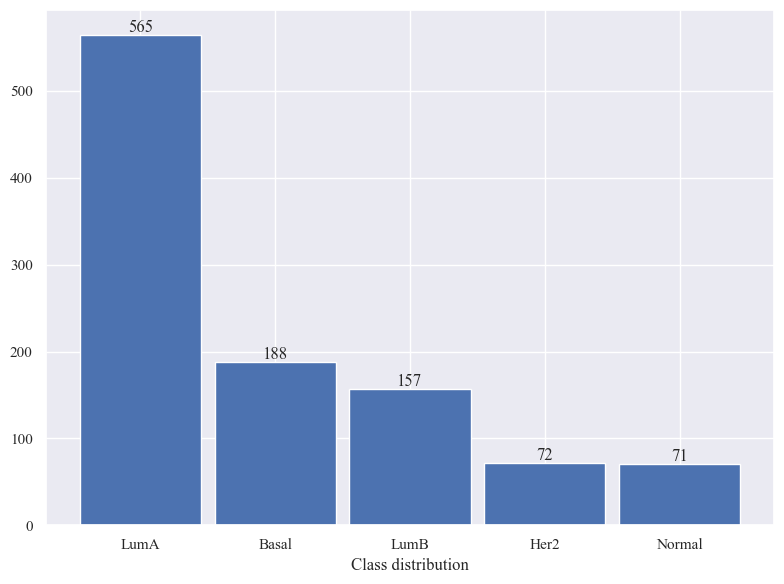

In [26]:
plt.figure(figsize=(8, 6))
ax = y_pam50.value_counts().plot(kind='bar', title='', width=0.9)

# Add text annotations for bar heights
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)
    
plt.xlabel("Class distribution")
plt.xticks(rotation=0)
plt.tight_layout()

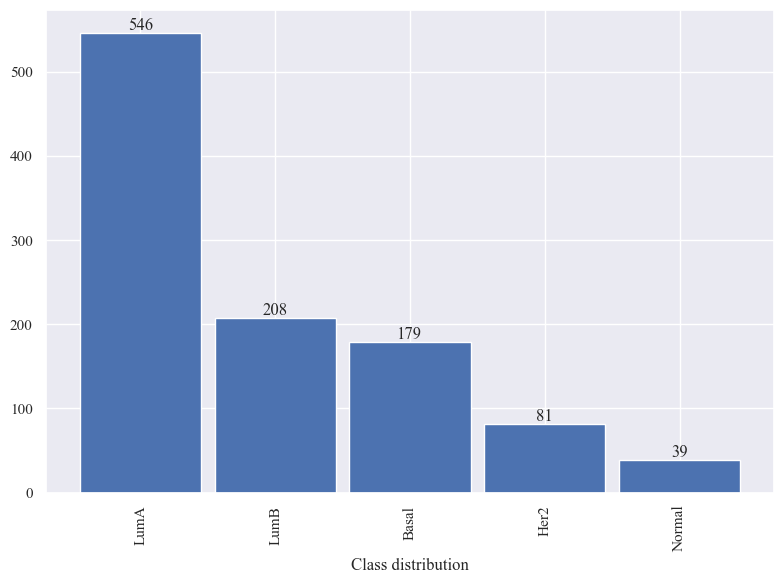

In [27]:
plt.figure(figsize=(8, 6))
ax = y_orig.value_counts().plot(kind='bar', title='', width=0.9)

# Add text annotations for bar heights
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)
plt.xlabel("Class distribution")

plt.tight_layout()

[Text(0, 0, "['LumA', 'Normal']"),
 Text(1, 0, "['LumA']"),
 Text(2, 0, "['Basal']"),
 Text(3, 0, "['LumA', 'LumB']"),
 Text(4, 0, "['LumB']"),
 Text(5, 0, "['Her2']"),
 Text(6, 0, "['Basal', 'Normal']"),
 Text(7, 0, "['Her2', 'LumB']"),
 Text(8, 0, "['Her2', 'LumA', 'LumB']"),
 Text(9, 0, "['Normal']"),
 Text(10, 0, "['Basal', 'Her2']"),
 Text(11, 0, "['Her2', 'LumA']"),
 Text(12, 0, "['Basal', 'Her2', 'LumB']"),
 Text(13, 0, "['Her2', 'Normal']")]

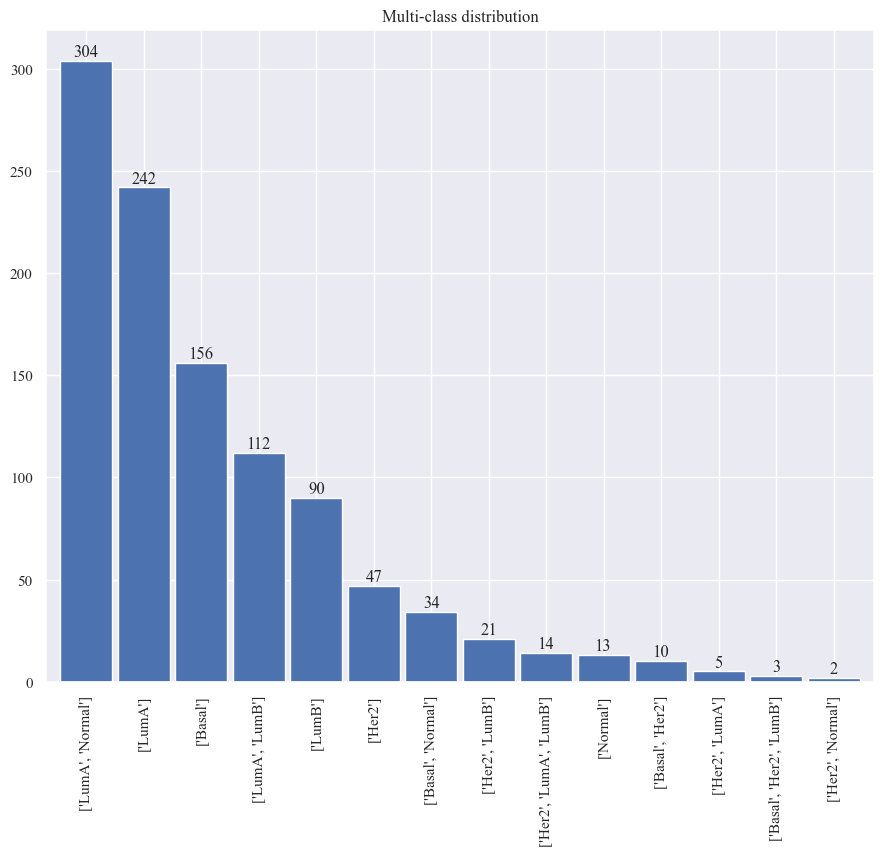

In [28]:
import re

plt.figure(figsize=(9, 8))
ax=y_mcut_5perc_labels.value_counts().plot(kind='bar', title='Multi-class distribution', width=0.9)
# ax.set_xticklabels(['LumA & Normal', 'LumA', 'Basal', 'LumA & LumB', 'LumB', 'Her2', 'Basal & Normal', 
#         'Her2 & LumB', 'Normal', 'LumA & Her2 & LumB', 'LumA & Her2', 'Basal & Her2', 
#         'Basal & Her2 & lumB', 'Basal & Her2 & Normal', 'Her2 & Normal', 'Her2 & LumA & Normal'])
# ax.get_xticklabels(['CRIS-C', 'CRIS-A', ''])
# ax.set_xticklabels([])
plt.xlabel('')

# Add text annotations for bar heights
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize=12)

plt.tight_layout()

# List to store arrays of extracted values
values_arrays = []

# Loop through each input string
for input_string in ax.get_xticklabels():
    values = re.findall(r'\d+', input_string.get_text())
    values_array = [int(val) for val in values]
    values_arrays.append(np.array(values_array))

label_values_multi = [label_values for i in range(30)]

# Initialize a list to store the extracted values
extracted_values = []

# Loop through each binary list and its corresponding string
for binary_list, string in zip(values_arrays, label_values_multi):
    # Remove zeros and append non-zero values to the extracted_values list
    non_zero_values = [string[i] for i in range(5) if binary_list[i] != 0]
    extracted_values.append(non_zero_values)

ax.set_xticklabels(extracted_values)

In [29]:
test_idx = y_test_5perc.index
test_tcga_idx = df_multi.iloc[test_idx, 0]
test_tcga_idx

34     TCGA-AC-A6IW
786    TCGA-C8-A27A
451    TCGA-AC-A2QI
11     TCGA-A2-A0YE
599    TCGA-D8-A27I
           ...     
995    TCGA-A2-A25B
917    TCGA-C8-A26X
148    TCGA-C8-A8HR
946    TCGA-AN-A0FN
991    TCGA-A1-A0SN
Name: tcga_id, Length: 316, dtype: object

In [30]:
# with open('../models/multi-label_models/ml_best_model_lr03-07-2023_00:31:05.pkl', 'rb') as f:
#     model_xgb_br = pickle.load(f)

# with open('../models/multi-label_models/ml_chain_best_model_lr03-07-2023_02:03:48.pkl', 'rb') as f:
#     model_xgb_cc = pickle.load(f)

# with open('../models/multi-label_models/ml_best_model_lr05-07-2023_00:43:55.pkl', 'rb') as f:
#     model_lr_br = pickle.load(f)

# with open('../models/multi-label_models/ml_chain_best_model_lr05-07-2023_00:58:18.pkl', 'rb') as f:
#     model_lr_cc = pickle.load(f)

# with open('../models/multi-label_models/ml_best_model_lr06-07-2023_10:17:57.pkl', 'rb') as f:
#     model_svm_lp = pickle.load(f)

# with open('../models/multi-label_models/ml_best_model_lr05-07-2023_00:27:34.pkl', 'rb') as f:
#     model_rf_lp = pickle.load(f)

In [31]:
path_brca_ml = '../final_results/BRCA/multi-label'
path_brca_ml_pt = os.path.join(path_brca_ml, '03-09-2023_18:41:10')

# Logistic Regression - Binary Relevance
with open(os.path.join(path_brca_ml_pt, 'BR_LRegression_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_lr_br = pickle.load(file)
# Logistic Regression - Classifier Chain 
with open(os.path.join(path_brca_ml_pt, 'CC_LRegression_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_lr_cc = pickle.load(file)
# Logistic Regression - Label Powerset
with open(os.path.join(path_brca_ml_pt, 'LP_LRegression_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_lr_lp = pickle.load(file)

# XGBoost - Binary Relevance
with open(os.path.join(path_brca_ml_pt, 'BR_XGBoost_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_xgb_br = pickle.load(file)
# XGBoost - Classifier Chain 
with open(os.path.join(path_brca_ml_pt, 'CC_XGBoost_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_xgb_cc = pickle.load(file)
# XGBoost - Label Powerset
with open(os.path.join(path_brca_ml_pt, 'LP_XGBoost_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_xgb_lp = pickle.load(file)

# Random Forest - Binary Relevance
with open(os.path.join(path_brca_ml_pt, 'BR_RForest_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_rf_br = pickle.load(file)
# Random Forest - Classifier Chain
with open(os.path.join(path_brca_ml_pt, 'CC_RForest_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_rf_cc = pickle.load(file)
# Random Forest - Label Powesret
with open(os.path.join(path_brca_ml_pt, 'LP_RForest_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_rf_lp = pickle.load(file)

# SVC - Binary Relevance 
with open(os.path.join(path_brca_ml_pt, 'BR_SVC_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_svm_br = pickle.load(file)
# SVC - Classifier Chain
with open(os.path.join(path_brca_ml_pt, 'CC_SVC_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_svm_cc = pickle.load(file)
# SVC - Label Powesret
with open(os.path.join(path_brca_ml_pt, 'LP_SVC_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_svm_lp = pickle.load(file)


############################ Algorithm Adaptation and Ensemble #############################
path_brca_ml_aa = os.path.join(path_brca_ml, '30-08-2023_03:55:43')

with open(os.path.join(path_brca_ml_aa, 'MLkNN_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_mlknn = pickle.load(file)
with open(os.path.join(path_brca_ml_aa, 'MLARAM_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_mlaram = pickle.load(file)

with open(os.path.join(path_brca_ml_aa, 'EnsembleCC_XGBoost_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_ecc_xgb = pickle.load(file)
with open(os.path.join(path_brca_ml_aa, 'EnsembleCC_RForest_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_ecc_rf = pickle.load(file)
with open(os.path.join(path_brca_ml_aa, 'EnsembleCC_LRegression_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_ecc_lr = pickle.load(file)
with open(os.path.join(path_brca_ml_aa, 'EnsembleCC_SVC_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_ecc_svm = pickle.load(file)

with open(os.path.join(path_brca_ml_aa, 'EnsembleRakel_XGBoost_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_er_xgb = pickle.load(file)
with open(os.path.join(path_brca_ml_aa, 'EnsembleRakel_RForest_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_er_rf = pickle.load(file)
with open(os.path.join(path_brca_ml_aa, 'EnsembleRakel_LRegression_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_er_lr = pickle.load(file)
with open(os.path.join(path_brca_ml_aa, 'EnsembleRakel_SVC_mcut_5perc_bestmodel.pkl'), 'rb') as file:
    brca_ml_model_er_svm = pickle.load(file)

In [32]:
from sklearn.preprocessing import normalize

# Define a mapping dictionary
mapping = {0: 'Basal', 1: 'Her2', 2: 'LumA', 3: 'LumB', 4: 'Normal'}

## Get the predictions and probabilities for each model and set the original test indices
# X_test_scaled_selected = X_scaled_selected
# y_test_5perc = y_mcut_5perc_labels

############################### XGBoost ###############################
xgb_br_preds = brca_ml_model_xgb_br.predict(X_test_scaled_selected).toarray()
xgb_br_preds = pd.DataFrame(xgb_br_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
xgb_br_prob_preds = brca_ml_model_xgb_br.predict_proba(X_test_scaled_selected).toarray()
xgb_br_prob_preds = pd.DataFrame(xgb_br_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

xgb_cc_preds = brca_ml_model_xgb_cc.predict(X_test_scaled_selected).toarray()
xgb_cc_preds = pd.DataFrame(xgb_cc_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
xgb_cc_prob_preds = brca_ml_model_xgb_cc.predict_proba(X_test_scaled_selected).toarray()
xgb_cc_prob_preds = pd.DataFrame(xgb_cc_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# ############################### Logistic Regression ###############################
lr_br_preds = brca_ml_model_lr_br.predict(X_test_scaled_selected).toarray()
lr_br_preds = pd.DataFrame(lr_br_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
lr_br_prob_preds = brca_ml_model_lr_br.predict_proba(X_test_scaled_selected).toarray()
lr_br_prob_preds = pd.DataFrame(lr_br_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

lr_cc_preds = brca_ml_model_lr_cc.predict(X_test_scaled_selected).toarray()
lr_cc_preds = pd.DataFrame(lr_cc_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
lr_cc_prob_preds = brca_ml_model_lr_cc.predict_proba(X_test_scaled_selected).toarray()
lr_cc_prob_preds = pd.DataFrame(lr_cc_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# ############################### SVM ###############################
svm_lp_preds = brca_ml_model_svm_lp.predict(X_test_scaled_selected).toarray()
svm_lp_preds = pd.DataFrame(svm_lp_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
svm_lp_prob_preds = brca_ml_model_svm_lp.predict_proba(X_test_scaled_selected).toarray()
svm_lp_prob_preds = pd.DataFrame(svm_lp_prob_preds, index=y_test_5perc.index, columns=y_test_5perc.columns)

# ############################### Random Forest ###############################
rf_lp_preds = brca_ml_model_rf_lp.predict(X_test_scaled_selected).toarray()
rf_lp_preds = pd.DataFrame(rf_lp_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
rf_lp_prob_preds = brca_ml_model_rf_lp.predict_proba(X_test_scaled_selected).toarray()
rf_lp_prob_preds = pd.DataFrame(rf_lp_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# NOT OPTIMAL
xgb_lp_preds = brca_ml_model_xgb_lp.predict(X_test_scaled_selected).toarray()
xgb_lp_preds = pd.DataFrame(xgb_lp_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
xgb_lp_prob_preds = brca_ml_model_xgb_lp.predict_proba(X_test_scaled_selected).toarray()
xgb_lp_prob_preds = pd.DataFrame(xgb_lp_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

lr_lp_preds = brca_ml_model_lr_lp.predict(X_test_scaled_selected).toarray()
lr_lp_preds = pd.DataFrame(lr_lp_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
lr_lp_prob_preds = brca_ml_model_lr_lp.predict_proba(X_test_scaled_selected).toarray()
lr_lp_prob_preds = pd.DataFrame(lr_lp_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

svm_br_preds = brca_ml_model_svm_br.predict(X_test_scaled_selected).toarray()
svm_br_preds = pd.DataFrame(svm_br_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
svm_br_prob_preds = brca_ml_model_svm_br.predict_proba(X_test_scaled_selected).toarray()
svm_br_prob_preds = pd.DataFrame(svm_br_prob_preds, index=y_test_5perc.index, columns=y_test_5perc.columns)

svm_cc_preds = brca_ml_model_svm_cc.predict(X_test_scaled_selected).toarray()
svm_cc_preds = pd.DataFrame(svm_cc_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
svm_cc_prob_preds = brca_ml_model_svm_cc.predict_proba(X_test_scaled_selected).toarray()
svm_cc_prob_preds = pd.DataFrame(svm_cc_prob_preds, index=y_test_5perc.index, columns=y_test_5perc.columns)

rf_br_preds = brca_ml_model_rf_br.predict(X_test_scaled_selected).toarray()
rf_br_preds = pd.DataFrame(rf_br_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
rf_br_prob_preds = brca_ml_model_rf_br.predict_proba(X_test_scaled_selected).toarray()
rf_br_prob_preds = pd.DataFrame(rf_br_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

rf_cc_preds = brca_ml_model_rf_cc.predict(X_test_scaled_selected).toarray()
rf_cc_preds = pd.DataFrame(rf_cc_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
rf_cc_prob_preds = brca_ml_model_rf_cc.predict_proba(X_test_scaled_selected).toarray()
rf_cc_prob_preds = pd.DataFrame(rf_cc_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

############################ Algorithm Adaptation #############################
mlknn_preds = brca_ml_model_mlknn.predict(X_test_scaled_selected).toarray()
mlknn_preds = pd.DataFrame(mlknn_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
mlknn_prob_preds = brca_ml_model_mlknn.predict_proba(X_test_scaled_selected).toarray()
mlknn_prob_preds = pd.DataFrame(mlknn_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

mlaram_preds = brca_ml_model_mlaram.predict(X_test_scaled_selected.values)
mlaram_preds = pd.DataFrame(mlaram_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
mlaram_prob_preds = brca_ml_model_mlaram.predict_proba(X_test_scaled_selected.values)
mlaram_prob_preds = pd.DataFrame(mlaram_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

####################### Ensemble #########################
ecc_xgb_preds = brca_ml_model_ecc_xgb.predict(X_test_scaled_selected)
ecc_xgb_preds = pd.DataFrame(ecc_xgb_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
ecc_xgb_prob_preds = brca_ml_model_ecc_xgb.predict_proba(X_test_scaled_selected)
ecc_xgb_prob_preds = normalize(np.array([ecc_xgb_prob_preds[i][:, 1] for i in range(5)]).transpose(), axis=1, norm='l1')
ecc_xgb_prob_preds = pd.DataFrame(ecc_xgb_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

er_xgb_preds = brca_ml_model_er_xgb.predict(X_test_scaled_selected).todense()
er_xgb_preds = pd.DataFrame(er_xgb_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
er_xgb_prob_preds = brca_ml_model_er_xgb.predict_proba(X_test_scaled_selected).todense()
er_xgb_prob_preds = pd.DataFrame(er_xgb_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

ecc_rf_preds = brca_ml_model_ecc_rf.predict(X_test_scaled_selected)
ecc_rf_preds = pd.DataFrame(ecc_rf_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
ecc_rf_prob_preds = brca_ml_model_ecc_rf.predict_proba(X_test_scaled_selected)
ecc_rf_prob_preds = normalize(np.array([ecc_rf_prob_preds[i][:, 1] for i in range(5)]).transpose(), axis=1, norm='l1')
ecc_rf_prob_preds = pd.DataFrame(ecc_rf_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

er_rf_preds = brca_ml_model_er_rf.predict(X_test_scaled_selected).todense()
er_rf_preds = pd.DataFrame(er_rf_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
er_rf_prob_preds = brca_ml_model_er_rf.predict_proba(X_test_scaled_selected).todense()
er_rf_prob_preds = pd.DataFrame(er_rf_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

ecc_lr_preds = brca_ml_model_ecc_lr.predict(X_test_scaled_selected)
ecc_lr_preds = pd.DataFrame(ecc_lr_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
ecc_lr_prob_preds = brca_ml_model_ecc_lr.predict_proba(X_test_scaled_selected)
ecc_lr_prob_preds = normalize(np.array([ecc_lr_prob_preds[i][:, 1] for i in range(5)]).transpose(), axis=1, norm='l1')
ecc_lr_prob_preds = pd.DataFrame(ecc_lr_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

er_lr_preds = brca_ml_model_er_lr.predict(X_test_scaled_selected).todense()
er_lr_preds = pd.DataFrame(er_lr_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
er_lr_prob_preds = brca_ml_model_er_lr.predict_proba(X_test_scaled_selected).todense()
er_lr_prob_preds = pd.DataFrame(er_lr_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

ecc_svm_preds = brca_ml_model_ecc_svm.predict(X_test_scaled_selected)
ecc_svm_preds = pd.DataFrame(ecc_svm_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
ecc_svm_prob_preds = brca_ml_model_ecc_svm.predict_proba(X_test_scaled_selected)
ecc_svm_prob_preds = normalize(np.array([ecc_svm_prob_preds[i][:, 1] for i in range(5)]).transpose(), axis=1, norm='l1')
ecc_svm_prob_preds = pd.DataFrame(ecc_svm_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

er_svm_preds = brca_ml_model_er_svm.predict(X_test_scaled_selected).todense()
er_svm_preds = pd.DataFrame(er_svm_preds, columns=y_test_5perc.columns, index=y_test_5perc.index, dtype='int')
er_svm_prob_preds = brca_ml_model_er_svm.predict_proba(X_test_scaled_selected).todense()
er_svm_prob_preds = pd.DataFrame(er_svm_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

In [146]:
# ## Get the predictions and probabilities for each model and set the original test indices

# # XGBoost
# xgb_br_preds = model_xgb_br.predict(X_test_scaled_selected).toarray()
# xgb_br_preds = pd.DataFrame(xgb_br_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# xgb_cc_preds = model_xgb_cc.predict(X_test_scaled_selected).toarray()
# xgb_cc_preds = pd.DataFrame(xgb_cc_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# xgb_br_prob_preds = model_xgb_br.predict_proba(X_test_scaled_selected).toarray()
# xgb_br_prob_preds = pd.DataFrame(xgb_br_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# xgb_cc_prob_preds = model_xgb_cc.predict_proba(X_test_scaled_selected).toarray()
# xgb_cc_prob_preds = pd.DataFrame(xgb_cc_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# # Logistic Regression
# lr_br_preds = model_lr_br.predict(X_test_scaled_selected).toarray()
# lr_br_preds = pd.DataFrame(lr_br_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# lr_cc_preds = model_lr_cc.predict(X_test_scaled_selected).toarray()
# lr_cc_preds = pd.DataFrame(lr_cc_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# lr_br_prob_preds = model_lr_br.predict_proba(X_test_scaled_selected).toarray()
# lr_br_prob_preds = pd.DataFrame(lr_br_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# lr_cc_prob_preds = model_lr_cc.predict_proba(X_test_scaled_selected).toarray()
# lr_cc_prob_preds = pd.DataFrame(lr_cc_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# # SVM
# svm_lp_preds = model_svm_lp.predict(X_test_scaled_selected).toarray()
# svm_lp_preds = pd.DataFrame(svm_lp_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# svm_lp_prob_preds = model_svm_lp.predict_proba(X_test_scaled_selected).toarray()
# svm_lp_prob_preds = pd.DataFrame(svm_lp_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# # Random Forest
# rf_lp_preds = model_rf_lp.predict(X_test_scaled_selected).toarray()
# rf_lp_preds = pd.DataFrame(rf_lp_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# rf_lp_prob_preds = model_rf_lp.predict_proba(X_test_scaled_selected).toarray()
# rf_lp_prob_preds = pd.DataFrame(rf_lp_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)


In [33]:
from multilabel_metrics import semi_relaxed_accuracy, ordered_subset_accuracy, k_orders_subset_accuracy

print('XGBoost Binary Relevance: ', semi_relaxed_accuracy(xgb_br_prob_preds, y_test_pam50))
print('XGBoost Chain Classifier: ', semi_relaxed_accuracy(xgb_cc_prob_preds, y_test_pam50))
print('Logistic Regression Binary Relenace: ', semi_relaxed_accuracy(lr_br_prob_preds, y_test_pam50))
print('Logistic Regression Chain Classifier: ', semi_relaxed_accuracy(lr_cc_prob_preds, y_test_pam50))
print('SVM Label Powerset: ', semi_relaxed_accuracy(svm_lp_prob_preds, y_test_pam50))
print('Random Forest Label Powerset: ', semi_relaxed_accuracy(rf_lp_prob_preds, y_test_pam50))


predictions_5perc = rf_lp_preds
prob_predictions_5perc = rf_lp_prob_preds

print('Ordered subset accuracy: ', ordered_subset_accuracy(
y_test_mcut=y_test_5perc, predictions=predictions_5perc, 
y_test_corr=y_test_corr, prob_predictions=prob_predictions_5perc))
print('Subset accuracy for orders below k=1: ', k_orders_subset_accuracy(
y_test_mcut=y_test_5perc, predictions=predictions_5perc, 
y_test_corr=y_test_corr, prob_predictions=prob_predictions_5perc, k=1))
print('Subset accuracy for orders below k=2: ', k_orders_subset_accuracy(
y_test_mcut=y_test_5perc, predictions=predictions_5perc, 
y_test_corr=y_test_corr, prob_predictions=prob_predictions_5perc, k=2))
print('Subset accuracy for orders below k=3: ', k_orders_subset_accuracy(
y_test_mcut=y_test_5perc, predictions=predictions_5perc, 
y_test_corr=y_test_corr, prob_predictions=prob_predictions_5perc, k=3))



XGBoost Binary Relevance:  0.8734177215189873
XGBoost Chain Classifier:  0.8670886075949367
Logistic Regression Binary Relenace:  0.8860759493670886
Logistic Regression Chain Classifier:  0.8860759493670886
SVM Label Powerset:  0.9018987341772152
Random Forest Label Powerset:  0.8607594936708861
Ordered subset accuracy:  0.689873417721519
Subset accuracy for orders below k=1:  0.8259493670886076
Subset accuracy for orders below k=2:  0.689873417721519
Subset accuracy for orders below k=3:  0.689873417721519


<Figure size 1800x1000 with 0 Axes>

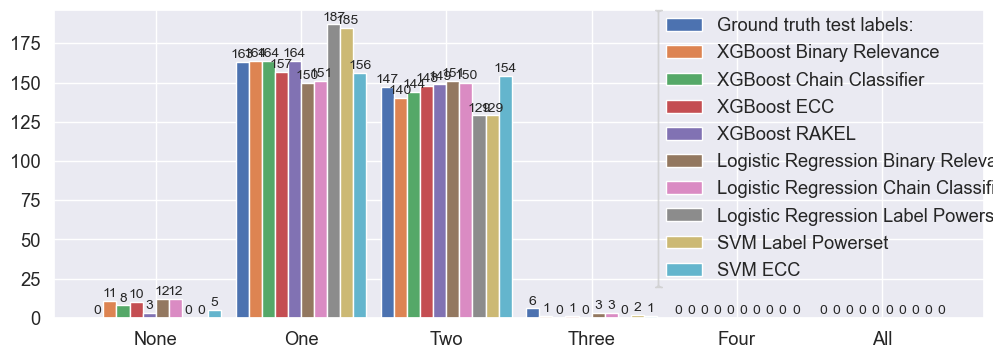

In [81]:
# Barplots for number of labels predicted
ax = plt.figure(figsize=(18, 10))
df_lr = pd.DataFrame({
    'Ground truth test labels:': count_number_of_labels(y_test_5perc),
    'XGBoost Binary Relevance': count_number_of_labels(xgb_br_preds),
    'XGBoost Chain Classifier': count_number_of_labels(xgb_cc_preds),
    'XGBoost ECC': count_number_of_labels(ecc_xgb_preds),
    'XGBoost RAKEL': count_number_of_labels(er_xgb_preds),
    'Logistic Regression Binary Relevance': count_number_of_labels(lr_br_preds),
    'Logistic Regression Chain Classifier': count_number_of_labels(lr_cc_preds),
    'Logistic Regression Label Powerset': count_number_of_labels(lr_lp_preds),
    'SVM Label Powerset': count_number_of_labels(svm_lp_preds),
    'SVM ECC': count_number_of_labels(ecc_svm_preds),
    }, 
    index=['None', 'One', 'Two', 'Three', 'Four', 'All']
)
ax = df_lr.plot(kind='bar', rot=0, width = 0.9)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                (g.get_x() + g.get_width() / 2, g.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=10)
plt.legend(bbox_to_anchor=(0.65, 1), ncol=1, mode="expand", borderaxespad=0)

## Double check of these results

The strange thing that needs to be further explored is the non-existance of labels for the first 4 models/approaches. Firstly, let's check if the samples that have no labels assigned are similar among these models. 

In [41]:
# Get non-labelled samples
non_label_samples_xgb_br = set(xgb_br_preds[xgb_br_preds.sum(axis=1) == 0].index)
non_label_samples_xgb_cc = set(xgb_cc_preds[xgb_cc_preds.sum(axis=1) == 0].index)
non_label_samples_lr_br = set(lr_br_preds[lr_br_preds.sum(axis=1) == 0].index)
non_label_samples_lr_cc = set(lr_cc_preds[lr_cc_preds.sum(axis=1) == 0].index)

# Intersection
intersection = non_label_samples_xgb_br.intersection(non_label_samples_lr_cc).\
    intersection(non_label_samples_lr_br).intersection(non_label_samples_lr_cc)
intersection = list(intersection)
print("Intersection: ", intersection)

# Union
union = non_label_samples_xgb_br.union(non_label_samples_lr_cc).\
    union(non_label_samples_lr_br).union(non_label_samples_lr_cc)
union = list(union)
print('Union: ', union)

Intersection:  [1034, 785, 306, 436, 186]
Union:  [1024, 705, 1034, 715, 716, 785, 723, 147, 917, 799, 226, 432, 306, 436, 117, 822, 889, 186]


In [42]:
df_intersection = df_multi.iloc[intersection, -5:]
df_intersection

,Basal,Her2,LumA,LumB,Normal
1034,0.112605,0.0,0.000000,0.000000,0.297287
785,0.000000,0.0,0.151501,0.262425,0.000000
306,0.305354,0.0,0.000000,0.000000,0.123169
436,0.000000,0.0,0.208643,0.072845,0.000000
186,0.000000,0.0,0.143625,0.180504,0.056038


In [43]:
df_union = df_multi.iloc[union, -5:]
df_union

,Basal,Her2,LumA,LumB,Normal
1024,0.000000,0.000000,0.266459,0.332917,0.000000
705,0.000000,0.000000,0.202881,0.022521,0.008980
1034,0.112605,0.000000,0.000000,0.000000,0.297287
715,0.023193,0.000000,0.139880,0.000000,0.230444
716,0.000000,0.000000,0.203457,0.078319,0.042305
785,0.000000,0.000000,0.151501,0.262425,0.000000
723,0.000000,0.000000,0.113469,0.515486,0.000000
147,0.000000,0.042977,0.011477,0.077839,0.000000
917,0.000000,0.316879,0.000000,0.000000,0.000000
799,0.000000,0.072461,0.000000,0.354430,0.000000


In [44]:
# Compute average memberships of union samples 
avg_union_memberships = df_union.mean(axis=0)
avg_union_memberships

Basal     0.024508
Her2      0.058525
LumA      0.124218
LumB      0.128606
Normal    0.054054
dtype: float64

In [45]:
# Remove union samples from the original dataset
df_without_union_samples = df_multi.iloc[y_test_5perc.index, -5:].drop(index=df_union.index)
df_without_union_samples


,Basal,Her2,LumA,LumB,Normal
34,0.729748,0.000000,0.000000,0.000000,0.257143
786,0.000000,0.000000,0.000000,0.357023,0.000000
451,0.000000,0.000000,0.793421,0.000000,0.480624
11,0.749244,0.000000,0.000000,0.000000,0.245714
599,0.000000,0.000000,0.732917,0.000000,0.653974
...,...,...,...,...,...
513,0.000000,0.000000,0.717167,0.000000,0.665018
995,0.000000,0.124034,0.000000,0.486483,0.000000
148,0.103866,0.000000,0.195102,0.000000,0.412533
946,0.000000,0.000000,0.615654,0.000000,0.251188


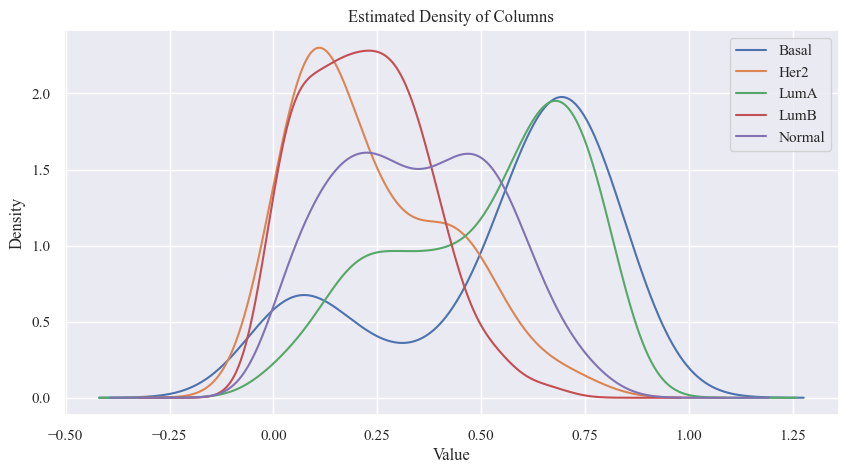

In [46]:
sigma_3s = []

plt.figure(figsize=(10, 5))
for column in df_without_union_samples.columns:
    # Do not conside zero correlations
    label_column = df_without_union_samples[column]
    label_column[label_column>0].plot.kde(label=column)

    # Calculate 3*sigma for each column
    sigma_3 = 3 * np.std(label_column)
    sigma_3s.append(sigma_3)

df_sigma_3 = pd.Series(sigma_3s, index=df_without_union_samples.columns)

plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Estimated Density of Columns')
plt.show()

In [47]:
df_sigma_3

Basal     0.792245
Her2      0.357836
LumA      0.886496
LumB      0.411425
Normal    0.677928
dtype: float64

In [48]:
from scipy.stats import ttest_ind

# Perform T-test for each column
for column in df_union.columns:
    t_stat, p_value = ttest_ind(
        df_union[column], 
        df_without_union_samples[column])

    print("T-statistic " + column + ": ", t_stat)
    print("P-value: " + column + ": ", p_value, '\n')

T-statistic Basal:  -1.6597414986244516
P-value: Basal:  0.09796479731787089 

T-statistic Her2:  0.5563719739012876
P-value: Her2:  0.5783528659543163 

T-statistic LumA:  -3.5814064932356455
P-value: LumA:  0.00039589103109524855 

T-statistic LumB:  1.4145777699642081
P-value: LumB:  0.15818316799532675 

T-statistic Normal:  -3.5816897777737617
P-value: Normal:  0.0003954788754717986 



## Three-labelled samples

In [36]:
# Samples with 3 labels
three_label_test_samples_idx = set(y_test_5perc[y_test_5perc.sum(axis=1) == 3].index)

three_label_test_samples = df_multi.iloc[list(three_label_test_samples_idx), -5:]
three_label_test_samples

,Basal,Her2,LumA,LumB,Normal
6,0.0,0.167827,0.284802,0.419736,0.000000
905,0.0,0.275486,0.150732,0.158415,0.000000
909,0.0,0.232653,0.224970,0.000000,0.154094
751,0.0,0.135270,0.208739,0.314670,0.000000
892,0.0,0.315342,0.197887,0.201825,0.000000
1023,0.0,0.184634,0.196447,0.293637,0.000000


In [37]:
three_label_test_samples_svm_lp_idx = set(svm_lp_preds[svm_lp_preds.sum(axis=1) == 3].index)
three_label_test_samples_svm_lp = df_multi.iloc[list(three_label_test_samples_svm_lp_idx), -5:]
three_label_test_samples_svm_lp

,Basal,Her2,LumA,LumB,Normal
322,0.409460,0.200288,0.000000,0.100312,0.000000
585,0.000000,0.000000,0.487155,0.175990,0.082929
336,0.257623,0.256951,0.000000,0.005234,0.000000
886,0.000000,0.470060,0.103577,0.052677,0.000000
87,0.000000,0.412341,0.030300,0.533349,0.000000


In [38]:
y_test_5perc.loc[three_label_test_samples_svm_lp_idx, :]

,Basal,Her2,LumA,LumB,Normal
322,1,0,0,0,0
585,0,0,1,0,0
336,0,1,0,0,0
886,0,1,0,0,0
87,0,1,0,1,0


In [39]:
svm_lp_preds.loc[three_label_test_samples_svm_lp_idx, :]

,Basal,Her2,LumA,LumB,Normal
322,1,1,0,1,0
585,0,1,1,1,0
336,1,1,0,0,1
886,0,1,1,1,0
87,0,1,1,1,0


# One-labelled samples analysis

In [49]:
# Function to get custom sorted indices for each row
def rank_indices(row):
    return row.rank(ascending=False).astype(int)

def cmp_statistics_for_one_labelled_samples(predictions, gt_labels, df_multi, X_test_scaled_selected):

    # Check dimensions
    assert predictions.shape == gt_labels.shape

    # Set the original indices
    predictions.set_index(gt_labels.index, inplace=True)

    # Get samples's predictions and GTs with only one label
    preds_one_label_idx = predictions.sum(axis=1) == 1
    preds_one_label = predictions[predictions.sum(axis=1) == 1]
    gt_samples_one_label = gt_labels[gt_labels.sum(axis=1) == 1]

    print("Number of 1-labelled samples from GT test set: ", gt_samples_one_label.shape[0])
    print("Number of 1-labelled samples from predicted test set: ", preds_one_label.shape[0])

    # Find the samples with one label that appeared in GT and prediction
    one_label_overlap_idx = set(gt_samples_one_label.index).\
        intersection(set(preds_one_label.index))
    print('Number of samples that overlap:', len(one_label_overlap_idx))

    # Now check how many of them have the exact same label assigned
    overlap = preds_one_label.loc[list(one_label_overlap_idx), :]
    gt_overlap = gt_samples_one_label.loc[list(one_label_overlap_idx), :]
    print('Number of samples correctly predicted: ', len(one_label_overlap_idx) - (overlap != gt_overlap).sum(axis=1).sum())

    # Applying the rank-function to each row of the GT correlation/membership values
    X_corr_test = df_multi.iloc[X_test_scaled_selected.index, -5:]
    ranked_indices = X_corr_test.apply(rank_indices, axis=1)

    # Create DataFrame from ranked values
    ranked_corr_df = pd.DataFrame(ranked_indices.values.tolist(), columns=X_corr_test.columns, index=X_corr_test.index)
    assert ranked_corr_df.shape == gt_labels.shape
    ranked_corr_labelled_df = ranked_corr_df * gt_labels

    # Find rows with only one label in the predictions DataFrame
    single_label_rows = predictions.sum(axis=1) == 1

    # Extract corresponding rows from predictions and GT ranks and GT labels
    ranked_for_single_label = ranked_corr_labelled_df[single_label_rows]
    predictions_df = predictions[single_label_rows]
    gt_df = gt_labels[single_label_rows]

    num_complet_correct = ((predictions_df==gt_df).sum(axis=1) == 5).sum()
    print('Number of well predicted:', num_complet_correct)

    # Count how many samples where 1 is in predictions correspond to rank 1 in the ranked DataFrame
    count_ones_at_rank_one = ((ranked_for_single_label == 1) & (predictions_df == 1)).sum().sum()
    # Count how many samples where 1 is in predictions correspond to rank 2 in the ranked DataFrame
    count_ones_at_rank_two = ((ranked_for_single_label == 2) & (predictions_df == 1)).sum().sum()
    # Count how many samples where 1 is in predictions correspond to rank 2 in the ranked DataFrame
    count_ones_at_rank_zero = ((ranked_for_single_label == 0) & (predictions_df == 1)).sum().sum()
    # Count how many samples where 1 is in predictions correspond to rank 2 in the ranked DataFrame
    count_ones_at_rank_three = ((ranked_for_single_label == 3) & (predictions_df == 1)).sum().sum()

    print("Number of samples where 1 is in predictions and corresponds to rank 1 in ranked DataFrame:", count_ones_at_rank_one)
    print("Number of samples where 1 is in predictions and corresponds to rank 2 in ranked DataFrame:", count_ones_at_rank_two)
    print("Number of samples where 1 is in predictions and corresponds to rank 3 in ranked DataFrame:", count_ones_at_rank_three)
    print("Number of samples not well predicted:", count_ones_at_rank_zero)

    # Now, let's compute some percentages
    first_perc = num_complet_correct / count_ones_at_rank_one
    second_perc = num_complet_correct / (count_ones_at_rank_one + count_ones_at_rank_two + count_ones_at_rank_three)

    results = {
        'completelly correct': num_complet_correct,
        'primary label correct': count_ones_at_rank_one,
        'secondary label correct': count_ones_at_rank_two,
        'tertiary label correct': count_ones_at_rank_three,
        'p and s and t correcr': count_ones_at_rank_one + count_ones_at_rank_two + count_ones_at_rank_three, 
        'first percentage': first_perc,
        'second percentage': second_perc
    }

    return results

print('XGBoost with Binary Relenace:')    
xgb_br_results = cmp_statistics_for_one_labelled_samples(predictions=xgb_br_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nXGBoost with Chain Clasifier:')
xgb_cc_results = cmp_statistics_for_one_labelled_samples(predictions=xgb_cc_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nLogistic Regression with Binary Relevance:')
lr_br_results = cmp_statistics_for_one_labelled_samples(predictions=lr_br_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nLogistic Regression with Chain Clasifier:')
lr_cc_results = cmp_statistics_for_one_labelled_samples(predictions=lr_cc_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nSVM with Label Powerset:')
svm_lp_results = cmp_statistics_for_one_labelled_samples(predictions=svm_lp_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nRandom Forest with Label Powerset:')
rf_lp_results = cmp_statistics_for_one_labelled_samples(predictions=rf_lp_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)

XGBoost with Binary Relenace:
Number of 1-labelled samples from GT test set:  163
Number of 1-labelled samples from predicted test set:  164
Number of samples that overlap: 129
Number of samples correctly predicted:  127
Number of well predicted: 128
Number of samples where 1 is in predictions and corresponds to rank 1 in ranked DataFrame: 155
Number of samples where 1 is in predictions and corresponds to rank 2 in ranked DataFrame: 6
Number of samples where 1 is in predictions and corresponds to rank 3 in ranked DataFrame: 1
Number of samples not well predicted: 2

XGBoost with Chain Clasifier:
Number of 1-labelled samples from GT test set:  163
Number of 1-labelled samples from predicted test set:  164
Number of samples that overlap: 131
Number of samples correctly predicted:  129
Number of well predicted: 130
Number of samples where 1 is in predictions and corresponds to rank 1 in ranked DataFrame: 157
Number of samples where 1 is in predictions and corresponds to rank 2 in ranked D

In [41]:
# Reversed statistics for ground truth inspection

def cmp_statistics_for_one_labelled_samples(predictions, gt_labels, df_multi, X_test_scaled_selected):

    # Check dimensions
    assert predictions.shape == gt_labels.shape

    # Set the original indices
    predictions.set_index(gt_labels.index, inplace=True)

    # Get samples's predictions and GTs with only one label
    preds_one_label = predictions[predictions.sum(axis=1) == 1]
    gt_samples_one_label = gt_labels[gt_labels.sum(axis=1) == 1]

    print("Number of 1-labelled samples from GT test set: ", gt_samples_one_label.shape[0])
    print("Number of 1-labelled samples from predicted test set: ", preds_one_label.shape[0])

    # Find the samples with one label that appeared in GT and prediction
    one_label_overlap_idx = set(gt_samples_one_label.index).\
        intersection(set(preds_one_label.index))
    print('Number of samples that overlap:', len(one_label_overlap_idx))

    # Now check how many of them have the exact same label assigned
    overlap = preds_one_label.loc[list(one_label_overlap_idx), :]
    gt_overlap = gt_samples_one_label.loc[list(one_label_overlap_idx), :]
    print('Number of samples correctly predicted: ', len(one_label_overlap_idx) - (overlap != gt_overlap).sum(axis=1).sum())

    # Applying the rank-function to each row of the GT correlation/membership values
    X_corr_test = df_multi.iloc[X_test_scaled_selected.index, -5:]
    ranked_indices = X_corr_test.apply(rank_indices, axis=1)

    # Create DataFrame from ranked values
    ranked_corr_df = pd.DataFrame(ranked_indices.values.tolist(), columns=X_corr_test.columns, index=X_corr_test.index)
    assert ranked_corr_df.shape == gt_labels.shape
    ranked_corr_labelled_df = ranked_corr_df * gt_labels

    # Find rows with only one label in the GT DataFrame
    single_label_rows = gt_labels.sum(axis=1) == 1

    # Extract corresponding rows from predictions and GT ranks and GT labels
    ranked_for_single_label = ranked_corr_labelled_df[single_label_rows]
    predictions_df = predictions[single_label_rows]
    gt_df = gt_labels[single_label_rows]

    num_complet_correct = ((predictions_df==gt_df).sum(axis=1) == 5).sum()
    print('Number of well predicted:', num_complet_correct)

    # Count how many samples where 1 is in predictions correspond to rank 1 in the ranked DataFrame
    count_ones_at_rank_one = ((ranked_for_single_label == 1) & (predictions_df == 1)).sum().sum()
    # Count how many samples where 1 is in predictions correspond to rank 2 in the ranked DataFrame
    count_ones_at_rank_two = ((ranked_for_single_label == 2) & (predictions_df == 1)).sum().sum()
    # Count how many samples where 1 is in predictions correspond to rank 2 in the ranked DataFrame
    count_ones_at_rank_zero = ((ranked_for_single_label == 0) & (predictions_df == 1)).sum().sum()
    # Count how many samples where 1 is in predictions correspond to rank 2 in the ranked DataFrame
    count_ones_at_rank_three = ((ranked_for_single_label == 3) & (predictions_df == 1)).sum().sum()

    print("Number of samples where 1 is in predictions and corresponds to rank 1 in ranked DataFrame:", count_ones_at_rank_one)
    print("Number of samples where 1 is in predictions and corresponds to rank 2 in ranked DataFrame:", count_ones_at_rank_two)
    print("Number of samples where 1 is in predictions and corresponds to rank 3 in ranked DataFrame:", count_ones_at_rank_three)
    print("Number of samples not well predicted:", count_ones_at_rank_zero)

    # Now, let's compute some percentages
    first_perc = num_complet_correct / count_ones_at_rank_one
    second_perc = num_complet_correct / (count_ones_at_rank_one + count_ones_at_rank_two + count_ones_at_rank_three)

    results = {
        'completelly correct': num_complet_correct,
        'primary label correct': count_ones_at_rank_one,
        'secondary label correct': count_ones_at_rank_two,
        'tertiary label correct': count_ones_at_rank_three,
        'p and s and t correcr': count_ones_at_rank_one + count_ones_at_rank_two + count_ones_at_rank_three, 
        'first percentage': first_perc,
        'second percentage': second_perc
    }

    return results

print('XGBoost with Binary Relenace:')    
xgb_br_results = cmp_statistics_for_one_labelled_samples(predictions=xgb_cc_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nXGBoost with Chain Clasifier:')
xgb_cc_results = cmp_statistics_for_one_labelled_samples(predictions=xgb_cc_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nLogistic Regression with Binary Relevance:')
lr_br_results = cmp_statistics_for_one_labelled_samples(predictions=lr_br_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nLogistic Regression with Chain Clasifier:')
lr_cc_results = cmp_statistics_for_one_labelled_samples(predictions=lr_cc_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nSVM with Label Powerset:')
svm_lp_results = cmp_statistics_for_one_labelled_samples(predictions=svm_lp_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nRandom Forest with Label Powerset:')
rf_lp_results = cmp_statistics_for_one_labelled_samples(predictions=rf_lp_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)

XGBoost with Binary Relenace:
Number of 1-labelled samples from GT test set:  162
Number of 1-labelled samples from predicted test set:  162
Number of samples that overlap: 129
Number of samples correctly predicted:  123
Number of well predicted: 126
Number of samples where 1 is in predictions and corresponds to rank 1 in ranked DataFrame: 151
Number of samples where 1 is in predictions and corresponds to rank 2 in ranked DataFrame: 2
Number of samples where 1 is in predictions and corresponds to rank 3 in ranked DataFrame: 0
Number of samples not well predicted: 31

XGBoost with Chain Clasifier:
Number of 1-labelled samples from GT test set:  162
Number of 1-labelled samples from predicted test set:  162
Number of samples that overlap: 129
Number of samples correctly predicted:  123
Number of well predicted: 126
Number of samples where 1 is in predictions and corresponds to rank 1 in ranked DataFrame: 151
Number of samples where 1 is in predictions and corresponds to rank 2 in ranked 

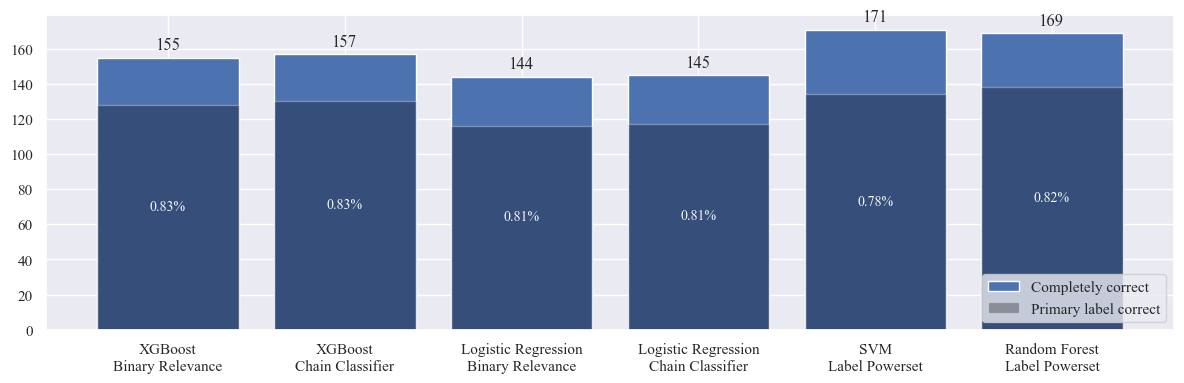

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the 6 bars
categories = ['XGBoost\nBinary Relevance', 'XGBoost\nChain Classifier', 'Logistic Regression\nBinary Relevance',
               'Logistic Regression\nChain Classifier', 'SVM\nLabel Powerset', 'Random Forest\nLabel Powerset']
values = [xgb_br_results['primary label correct'], xgb_cc_results['primary label correct'], 
          lr_br_results['primary label correct'], lr_cc_results['primary label correct'], 
          svm_lp_results['primary label correct'], rf_lp_results['primary label correct']]
overlay_values = [xgb_br_results['completelly correct'], xgb_cc_results['completelly correct'], 
                lr_br_results['completelly correct'], lr_cc_results['completelly correct'], 
                svm_lp_results['completelly correct'], rf_lp_results['completelly correct']]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the main bars
main_bars = ax.bar(categories, values, alpha=1, label='Completely correct')

# Create the overlay bars (transparent)
overlay_bars = ax.bar(categories, overlay_values, color='black', alpha=0.3, label='Primary label correct')

# Add labels and title
#ax.set_title('Bar Plot with Transparent Overlay Bars')

# Add height of main bars above them
for bar in main_bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

# Add specific numbers in the middle of overlaid bars
for category, value, overlay_value in zip(categories, values, overlay_values):
    x = categories.index(category)
    middle_y = (overlay_value) / 2
    ax.annotate("{:.2f}%".format(overlay_value / value), xy=(x, middle_y), xycoords='data',
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', color='white', fontsize=10)

ax.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


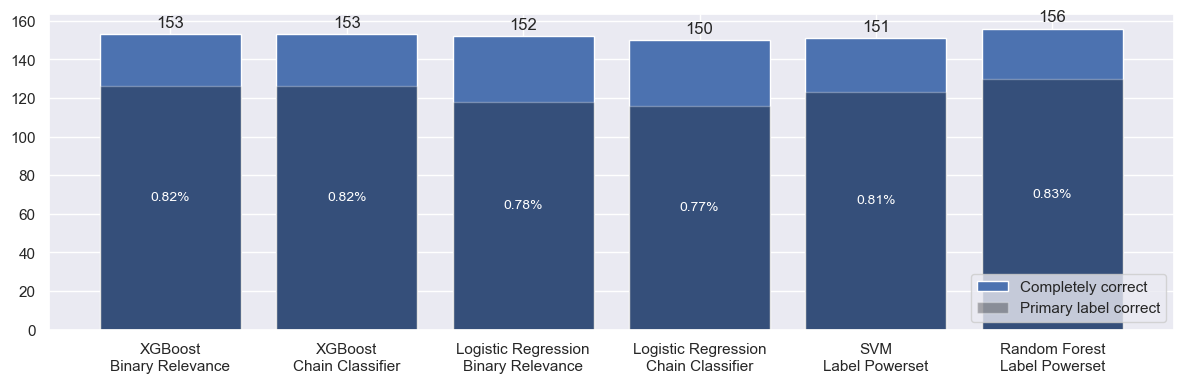

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the 6 bars
categories = ['XGBoost\nBinary Relevance', 'XGBoost\nChain Classifier', 'Logistic Regression\nBinary Relevance',
               'Logistic Regression\nChain Classifier', 'SVM\nLabel Powerset', 'Random Forest\nLabel Powerset']
values = [xgb_br_results["p and s and t correcr"], xgb_cc_results["p and s and t correcr"], 
          lr_br_results["p and s and t correcr"], lr_cc_results["p and s and t correcr"], 
          svm_lp_results["p and s and t correcr"], rf_lp_results["p and s and t correcr"]]
overlay_values = [xgb_br_results['completelly correct'], xgb_cc_results['completelly correct'], 
                lr_br_results['completelly correct'], lr_cc_results['completelly correct'], 
                svm_lp_results['completelly correct'], rf_lp_results['completelly correct']]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the main bars
main_bars = ax.bar(categories, values, alpha=1, label='Completely correct')

# Create the overlay bars (transparent)
overlay_bars = ax.bar(categories, overlay_values, color='black', alpha=0.3, label='Primary label correct')

# Add labels and title
#ax.set_title('Bar Plot with Transparent Overlay Bars')

# Add height of main bars above them
for bar in main_bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

# Add specific numbers in the middle of overlaid bars
for category, value, overlay_value in zip(categories, values, overlay_values):
    x = categories.index(category)
    middle_y = (overlay_value) / 2
    ax.annotate("{:.2f}%".format(overlay_value / value), xy=(x, middle_y), xycoords='data',
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', color='white', fontsize=10)

ax.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


In [51]:
def cmp_statistics_for_two_labelled_samples(predictions, probs, gt_labels, df_multi, X_test_scaled_selected):

    # Check dimensions
    assert predictions.shape == gt_labels.shape

    # Set the original indices
    predictions.set_index(gt_labels.index, inplace=True)
    probs.set_index(gt_labels.index, inplace=True)

    # Get samples's predictions and GTs with only two labels
    preds_two_labels_idx = predictions.sum(axis=1) == 2
    preds_two_labels = predictions[predictions.sum(axis=1) == 2]
    gt_samples_two_labels = gt_labels[gt_labels.sum(axis=1) == 2]

    print("Number of 2-labelled samples from GT test set: ", gt_samples_two_labels.shape[0])
    print("Number of 2-labelled samples from predicted test set: ", preds_two_labels.shape[0])

    # Find the samples with one label that appeared in GT and prediction
    two_labels_overlap_idx = set(gt_samples_two_labels.index).\
        intersection(set(preds_two_labels.index))
    print('Number of samples that overlap:', len(two_labels_overlap_idx))

    # Applying the rank-function to each row of the GT correlation/membership values
    X_corr_test = df_multi.iloc[X_test_scaled_selected.index, -5:]
    ranked_indices = X_corr_test.apply(rank_indices, axis=1)
    ranked_prob_indices = probs.apply(rank_indices, axis=1)

    # Create DataFrame from ranked values
    ranked_corr_df = pd.DataFrame(ranked_indices.values.tolist(), columns=X_corr_test.columns, index=X_corr_test.index)
    ranked_prob_df = pd.DataFrame(ranked_prob_indices.values.tolist(), columns=probs.columns, index=probs.index)

    assert ranked_corr_df.shape == gt_labels.shape
    ranked_corr_labelled_df = ranked_corr_df * gt_labels

    assert ranked_prob_df.shape == predictions.shape
    ranked_prob_labelled_df = ranked_prob_df * predictions

    # Find rows with only one label in the predictions DataFrame
    two_labelled_rows = predictions.sum(axis=1) == 2

    # Extract corresponding rows from predictions and GT ranks and GT labels
    ranked_for_double_label = ranked_corr_labelled_df[two_labelled_rows]
    ranked_probs_for_double_label = ranked_prob_labelled_df[two_labelled_rows]
    predictions_df = predictions[two_labelled_rows]
    gt_df = gt_labels[two_labelled_rows]

    # Count how many samples where 1 is in predictions correspond to rank 1 and 2 in correct order
    cnt_with_order_completely_correct = \
        ((ranked_for_double_label == ranked_probs_for_double_label).sum(axis=1) == 5).sum() # [1, 0, 2, 0, 0] == [1, 0, 2, 0, 0] 
    cnt_with_order_partially_correct = \
        ((((ranked_for_double_label == 1) & (ranked_probs_for_double_label == 1)) | \
          ((ranked_for_double_label == 2) & (ranked_probs_for_double_label == 2))).sum(axis=1) == 2).sum() # [1, 3, 2, 0, 0] == [1, 0, 2, 0, 0] 
    cnt_without_order_two_labels = ((predictions_df==gt_df).sum(axis=1) == 5).sum() # [2, 0, 1, 0, 0] == [1, 0, 2, 0, 0] 
    cnt_without_order_two_and_more_labels = ((predictions_df==gt_df).sum(axis=1) >= 4).sum() # [2, 0, 1, 0, 0] == [1, 0, 2, 0, 0] 

    print("\nNumber of samples with completely correct order: ", cnt_with_order_completely_correct)
    print("Number of samples with partially correct order: ", cnt_with_order_partially_correct)
    print("Number of samples correctly predicted in any order for only 2 labels: ", cnt_without_order_two_labels)
    print("Number of samples correctly predicted in any order: ", cnt_without_order_two_and_more_labels)

    # print(ranked_for_double_label, ranked_probs_for_double_label)

    # Count how many samples have same primary (pp), same secondary (ss) labels
    count_doubles_pp = (((ranked_for_double_label == 1) & (ranked_probs_for_double_label == 1))).sum(axis=1).sum()
    count_doubles_ss = (((ranked_for_double_label == 2) & (ranked_probs_for_double_label == 2))).sum(axis=1).sum()

    # Count how many samples have are primary but predicted as secondary (ps)
    count_doubles_ps = (((ranked_for_double_label == 1) & (ranked_probs_for_double_label == 2))).sum(axis=1).sum()

    # Count how many samples have are secondary but predicted as primary (sp)
    count_doubles_sp = (((ranked_for_double_label == 2) & (ranked_probs_for_double_label == 1))).sum(axis=1).sum()

    # Count how many samples have are terciry but predicted as secondary (ts)
    count_doubles_ts = (((ranked_for_double_label == 3) & (ranked_probs_for_double_label == 2))).sum(axis=1).sum()

    # Count how many samples have are terciary but predicted as primary (tp)
    count_doubles_tp = (((ranked_for_double_label == 3) & (ranked_probs_for_double_label == 1))).sum(axis=1).sum()

    # In order to print a confusion matrix st, pt and tt need to be defined too
    count_st, count_pt, count_tt = 0, 0, 0

    # Print confusion matrix
    conf_matrix = np.array([[count_doubles_pp, count_doubles_ps, 0],
                            [count_doubles_sp, count_doubles_ss, 0],
                            [count_doubles_tp, count_doubles_ts, 0]])
    # Define labels
    class_labels = ['Primary', 'Secondary', 'Tertiary']

    # Create a heatmap plot using Seaborn
    # plt.figure(figsize=(4, 3))
    # sns.set(font_scale=0.8)  # Adjust font size
    # sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    # plt.xlabel('Predicted Label')
    # plt.ylabel('True Label')

    # Count how many samples are not correctly predicted at all
    count_wrong = ((predictions_df == gt_df).sum(axis=1) <= 3).sum()

    print('\nNumber of samples pp: ', count_doubles_pp)
    print('Number of samples ss: ', count_doubles_ss)
    print('Number of samples ps: ', count_doubles_ps)
    print('Number of samples sp: ', count_doubles_sp)
    print('Number of samples ts: ', count_doubles_ts)
    print('Number of samples tp: ', count_doubles_tp)
    print('\nTotally wrong predicted: ', count_wrong)

    # Compute percentages
    first_perc = cnt_with_order_completely_correct / cnt_with_order_partially_correct
    second_perc = cnt_without_order_two_labels / cnt_without_order_two_and_more_labels

    print('Percentage 1st: ', first_perc)
    print('Percentage 2nd: ', second_perc)

    result = {
        'Completely correct without rank': cnt_without_order_two_labels,
        'Completely correct with rank': cnt_with_order_partially_correct,
        'Not correct': count_wrong,
        'Partially correct': preds_two_labels.shape[0] - cnt_without_order_two_labels - count_wrong,
        'Percentage 1st': first_perc,
        'Percentage 2nd': second_perc,
        'Confusion matrix': conf_matrix
    }
    return result


In [61]:
print('XGBoost with Binary Relevance: ')
xgb_br_res = cmp_statistics_for_two_labelled_samples(predictions=xgb_br_preds, probs=xgb_br_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('XGBoost with Chain Classifier: ')
xgb_cc_res = cmp_statistics_for_two_labelled_samples(predictions=xgb_cc_preds, probs=xgb_cc_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('XGBoost with RAKEL: ')
er_xgb_res = cmp_statistics_for_two_labelled_samples(predictions=er_xgb_preds, probs=er_xgb_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('Logistic Regression with Binary Relevance: ')
lr_br_res = cmp_statistics_for_two_labelled_samples(predictions=lr_br_preds, probs=lr_br_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('Logistic Regression with Chain Classifier: ')
lr_cc_res = cmp_statistics_for_two_labelled_samples(predictions=lr_cc_preds, probs=lr_cc_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('Logistic Regression with Label Powerset: ')
lr_lp_res = cmp_statistics_for_two_labelled_samples(predictions=lr_lp_preds, probs=lr_lp_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('SVM with Label Powerset: ')
svm_lp_res = cmp_statistics_for_two_labelled_samples(predictions=svm_lp_preds, probs=svm_lp_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)
print('SVM with ECC: ')
ecc_svm_res = cmp_statistics_for_two_labelled_samples(predictions=ecc_svm_preds, probs=ecc_svm_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('Random Forest with Label Powerset: ')
rf_lp_res = cmp_statistics_for_two_labelled_samples(predictions=rf_lp_preds, probs=rf_lp_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

XGBoost with Binary Relevance: 
Number of 2-labelled samples from GT test set:  147
Number of 2-labelled samples from predicted test set:  140
Number of samples that overlap: 114

Number of samples with completely correct order:  90
Number of samples with partially correct order:  90
Number of samples correctly predicted in any order for only 2 labels:  114
Number of samples correctly predicted in any order:  140

Number of samples pp:  114
Number of samples ss:  90
Number of samples ps:  26
Number of samples sp:  26
Number of samples ts:  0
Number of samples tp:  0

Totally wrong predicted:  0
Percentage 1st:  1.0
Percentage 2nd:  0.8142857142857143
XGBoost with Chain Classifier: 
Number of 2-labelled samples from GT test set:  147
Number of 2-labelled samples from predicted test set:  144
Number of samples that overlap: 116

Number of samples with completely correct order:  90
Number of samples with partially correct order:  90
Number of samples correctly predicted in any order for o

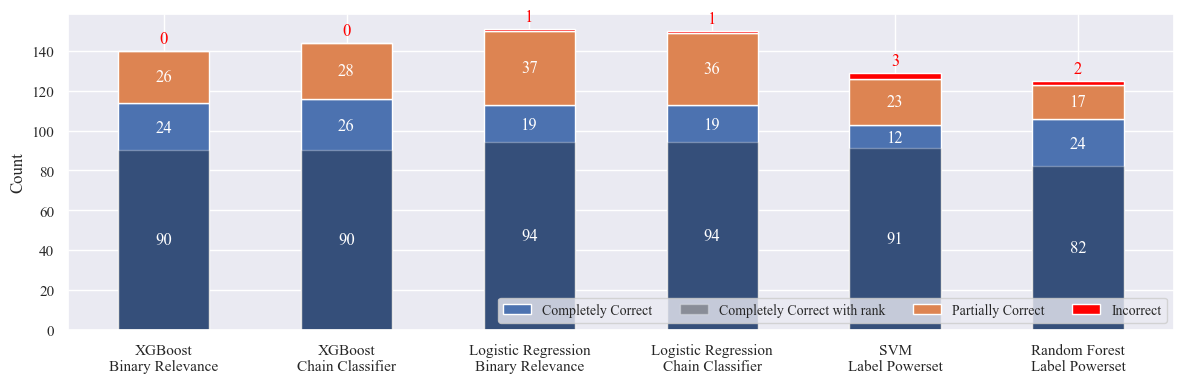

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for three models and their correctness breakdown
models = ['XGBoost\nBinary Relevance', 'XGBoost\nChain Classifier', 'Logistic Regression\nBinary Relevance',
        'Logistic Regression\nChain Classifier', 'SVM\nLabel Powerset', 'Random Forest\nLabel Powerset']
completely_correct = [xgb_br_res['Completely correct without rank'], xgb_cc_res['Completely correct without rank'],
                      lr_br_res['Completely correct without rank'], lr_cc_res['Completely correct without rank'],
                      svm_lp_res['Completely correct without rank'], rf_lp_res['Completely correct without rank']]
completely_correct_with_order = [xgb_br_res['Completely correct with rank'], xgb_cc_res['Completely correct with rank'],
                      lr_br_res['Completely correct with rank'], lr_cc_res['Completely correct with rank'],
                      svm_lp_res['Completely correct with rank'], rf_lp_res['Completely correct with rank']]
partially_correct = [xgb_br_res['Partially correct'], xgb_cc_res['Partially correct'],
                      lr_br_res['Partially correct'], lr_cc_res['Partially correct'],
                      svm_lp_res['Partially correct'], rf_lp_res['Partially correct']]
incorrect = [xgb_br_res['Not correct'], xgb_cc_res['Not correct'],
            lr_br_res['Not correct'], lr_cc_res['Not correct'],
            svm_lp_res['Not correct'], rf_lp_res['Not correct']]

# Create positions for bars
bar_width = 0.5
index = np.arange(len(models))

# Create the figure and axis
fig, ax = plt.subplots()

# Create stacked bars
ax.bar(index, completely_correct, width=bar_width, label='Completely Correct')
ax.bar(index, completely_correct_with_order, width=bar_width, label='Completely Correct with rank', color='black', alpha=0.3)
ax.bar(index, partially_correct, width=bar_width, label='Partially Correct', bottom=completely_correct)
ax.bar(index, incorrect, width=bar_width, label='Incorrect', bottom=np.array(completely_correct) + np.array(partially_correct), color='red')

# Add labels and title
ax.set_ylabel('Count')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend(ncol=4, loc='lower right', fontsize=10)

# Add values in the middle of each part
for i, (cc, cco, pc, ic) in enumerate(zip(completely_correct, completely_correct_with_order, partially_correct, incorrect)):
    x = index[i]
    y_cco = cco / 2
    y_cc = cco + (cc-cco) / 2 - 1
    y_pc = cc + pc / 2
    y_ic = cc + pc + ic + 6
    ax.text(x, y_cco, str(cco), ha='center', va='center', color='white', fontsize=12)
    ax.text(x, y_cc, str(cc-cco), ha='center', va='center', color='white', fontsize=12)
    ax.text(x, y_pc, str(pc), ha='center', va='center', color='white', fontsize=12)
    ax.text(x, y_ic, str(ic), ha='center', va='center', color='red', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


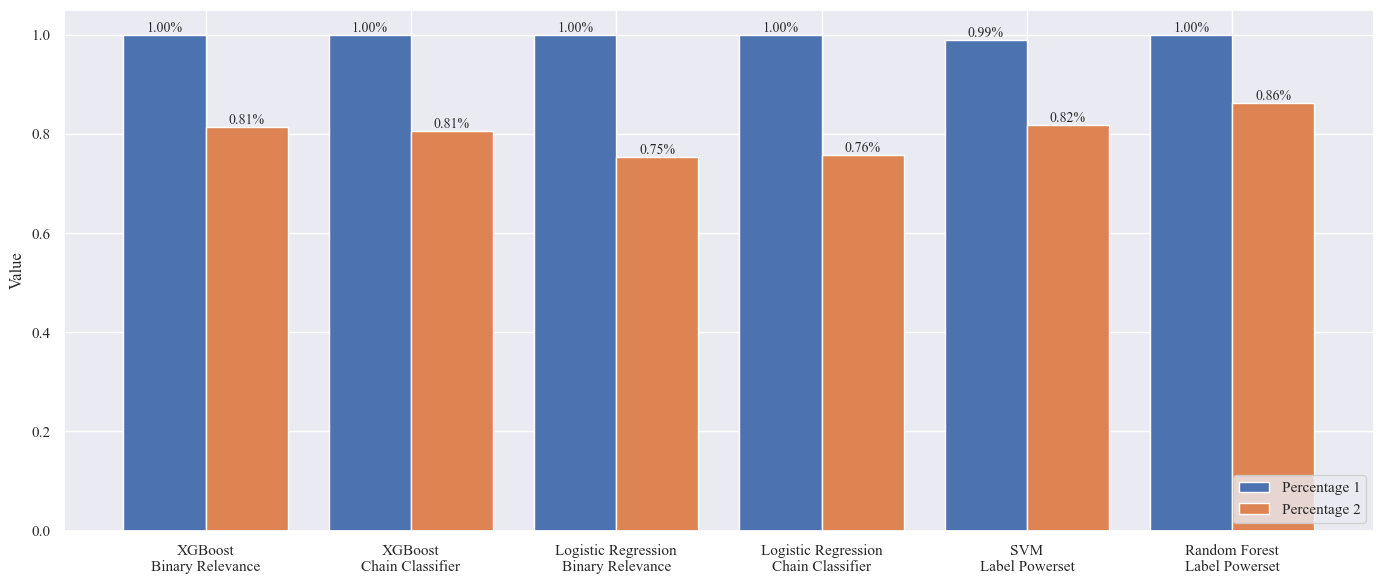

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for six models with two bars per model
models = ['XGBoost\nBinary Relevance', 'XGBoost\nChain Classifier', 'Logistic Regression\nBinary Relevance',
        'Logistic Regression\nChain Classifier', 'SVM\nLabel Powerset', 'Random Forest\nLabel Powerset']
perc_1 = [xgb_br_res['Percentage 1st'], xgb_cc_res['Percentage 1st'],
                      lr_br_res['Percentage 1st'], lr_cc_res['Percentage 1st'],
                      svm_lp_res['Percentage 1st'], rf_lp_res['Percentage 1st']]
perc_2 = [xgb_br_res['Percentage 2nd'], xgb_cc_res['Percentage 2nd'],
                      lr_br_res['Percentage 2nd'], lr_cc_res['Percentage 2nd'],
                      svm_lp_res['Percentage 2nd'], rf_lp_res['Percentage 2nd']]

# Create positions for the grouped bars
bar_width = 0.4
index = np.arange(len(models))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Create grouped bars for each model
ax.bar(index - bar_width / 2, perc_1, width=bar_width, label='Percentage 1')
ax.bar(index + bar_width / 2, perc_2, width=bar_width, label='Percentage 2')

# Add labels and title
ax.set_ylabel('Value')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend(loc='lower right')

# Add values on top of each bar
for i, (val1, val2) in enumerate(zip(perc_1, perc_2)):
    x = index[i]
    ax.text(x - bar_width / 2, val1 , "{:.2f}%".format(val1), ha='center', va='bottom', fontsize=10)
    ax.text(x + bar_width / 2, val2 , "{:.2f}%".format(val2), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


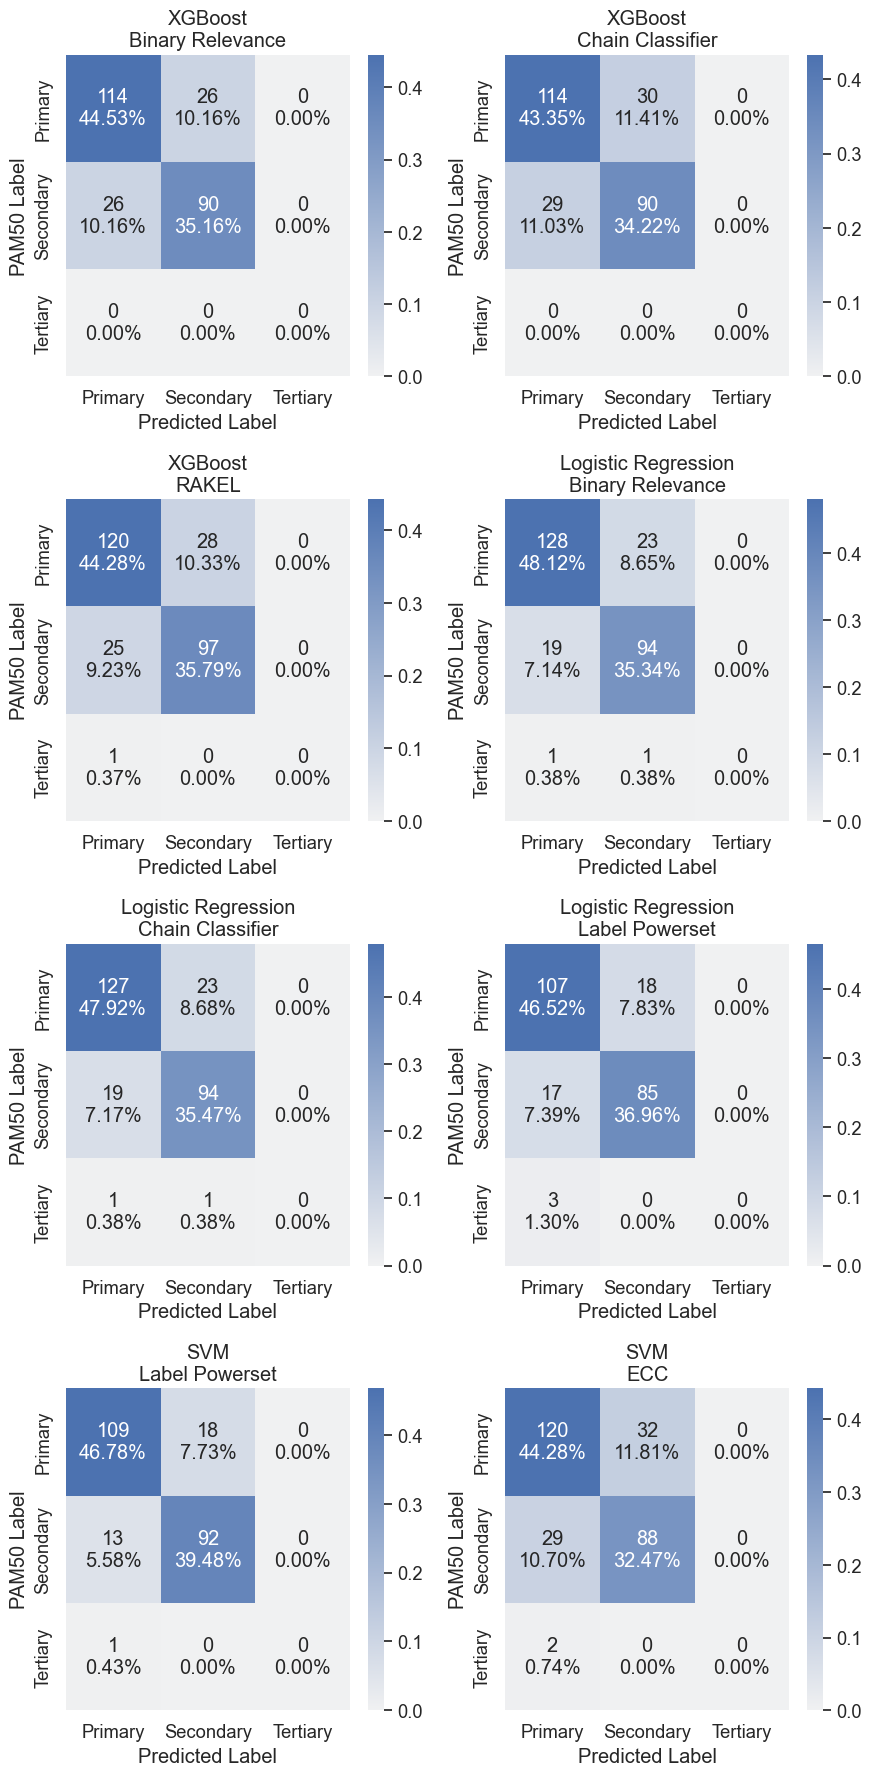

In [77]:
# Confusuion matrix
model_names = ['XGBoost\nBinary Relevance', 'XGBoost\nChain Classifier', 'XGBoost\nRAKEL', 
               'Logistic Regression\nBinary Relevance', 'Logistic Regression\nChain Classifier', 'Logistic Regression\nLabel Powerset',
                'SVM\nLabel Powerset', 'SVM\nECC']
conf_matrices = [xgb_br_res['Confusion matrix'], xgb_cc_res['Confusion matrix'], er_xgb_res['Confusion matrix'], 
                lr_br_res['Confusion matrix'], lr_cc_res['Confusion matrix'], lr_lp_res['Confusion matrix'],
                svm_lp_res['Confusion matrix'], ecc_svm_res['Confusion matrix']]

# # Use the deep color palette from Seaborn
# colors = ['Blues_r', 'Greens_r', 'Reds_r', 'Purples_r', 'Oranges_r', 'Greys_r', 'Yellows_r']

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(9, 18))

# Loop through each model and plot the confusion matrix in a specific color
for i, (conf_matrix, model_name) in enumerate(zip(conf_matrices, model_names)):

    row = i // 2
    col = i % 2


    # Normalize confusion matrix
    conf_matrix_norm = conf_matrix / conf_matrix.sum().sum()

    group_counts = ['{0:0.0f}'.format(value) for value in
                conf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        conf_matrix_norm.flatten()]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)

    # # Create a reversed colormap
    # cmap = sns.color_palette(color, as_cmap=True).reversed()
    
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix_norm, annot=labels, cmap=sns.color_palette("light:b", as_cmap=True), fmt='', ax=axes[row, col])

    # Add absolute numbers as subannotations
    
    axes[row, col].set_title(model_name)
    axes[row, col].set_xlabel('Predicted Label')
    axes[row, col].set_ylabel('PAM50 Label')
    axes[row, col].set_xticklabels(['Primary', 'Secondary', 'Tertiary'])
    axes[row, col].set_yticklabels(['Primary', 'Secondary', 'Tertiary'])

plt.tight_layout()
